# Semi-Supervised Approach

- Usage example on different dataset: https://github.com/AndreaBorghesi/anomaly_detection_HPC

In [1]:
import sys

sys.path.insert(0, "../../")  # add query_tool module

from query_tool import M100DataClient
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")

dataset_path = "../../dataset/22-09/year_month=22-09"
client = M100DataClient(dataset_path)

# Available plugins
plugins = list(client.metrics_per_plugin.keys())
print(plugins)

['ipmi', 'ganglia', 'vertiv', 'schneider', 'weather', 'logics', 'nagios', 'slurm', 'job_table']


In [2]:
all_metrics = {plugin: client.metrics_per_plugin[plugin] for plugin in plugins}

In [3]:
biggest_nodeID = 1162
nodes_rows = pd.DataFrame({"rows": [0] * (biggest_nodeID)}, dtype=int)
fill_na_rows = pd.DataFrame({"node": range(0, biggest_nodeID + 1, 1)}, dtype=int)

In [4]:
%%script false --no-raise-error

# Trying to know which are the nodes with the most data available
for plugin, metrics in all_metrics.items():
    for met in metrics:
        # Create dataset with {nodeID, number of rows of the metric}
        results = (
            client.query(metrics=[met], columns=["node"])
            .groupby("node", observed=False)
            .size()
            .reset_index(name="rows")
            .astype({"node": int})
            .sort_values("node")
            .reset_index(drop=True)
        )
        results = pd.merge(fill_na_rows, results, on="node", how="left")
        nodes_rows["rows"] += results["rows"].fillna(0)

display(
    nodes_rows.sort_values(by="rows", ascending=False)
    .head()
    .style.set_caption("Nodes with most available data")
)

In [5]:
df_ganglia = client.query_plugins(plugins="ganglia", node="2")

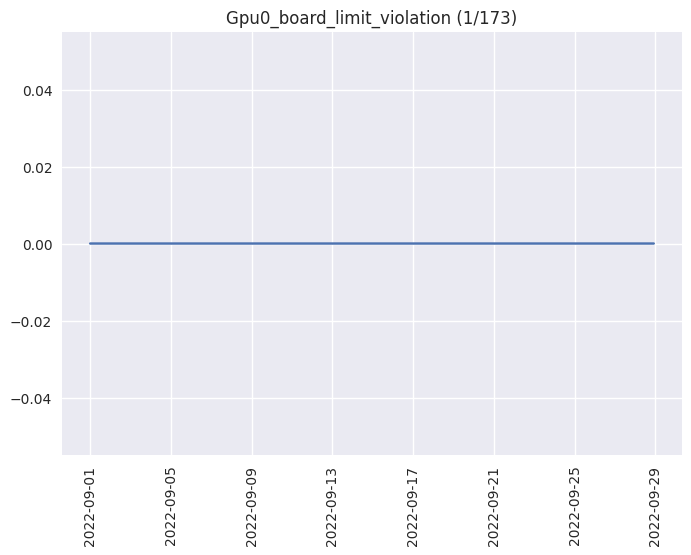

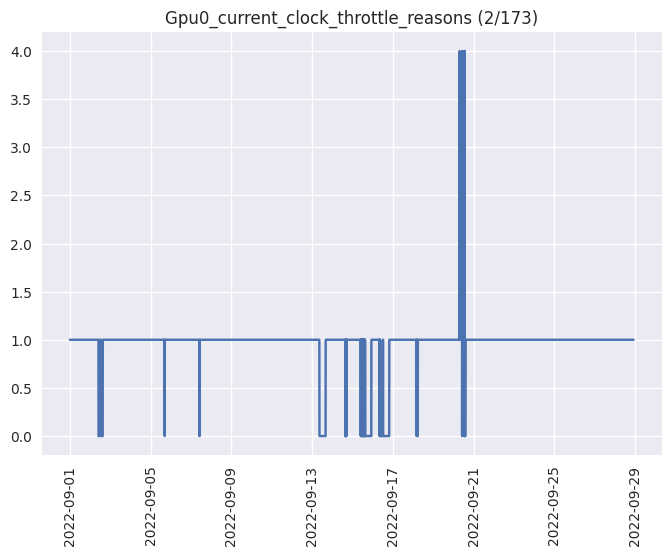

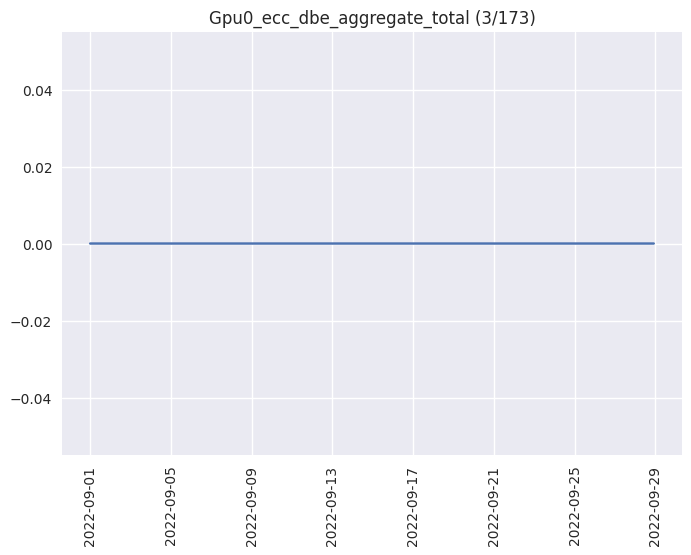

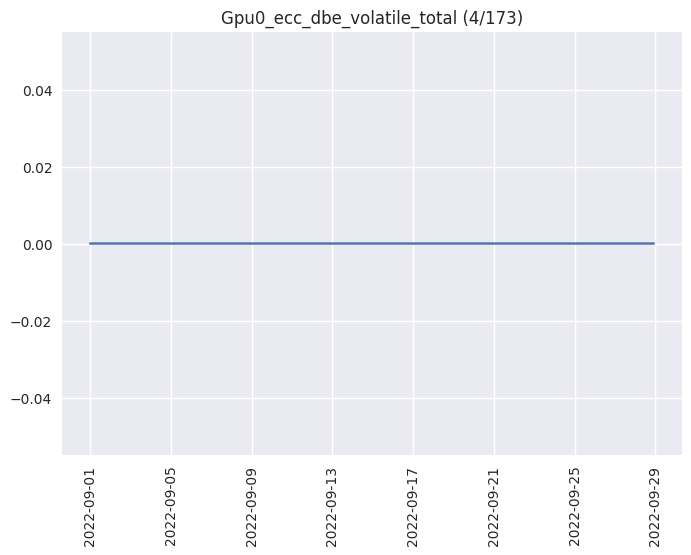

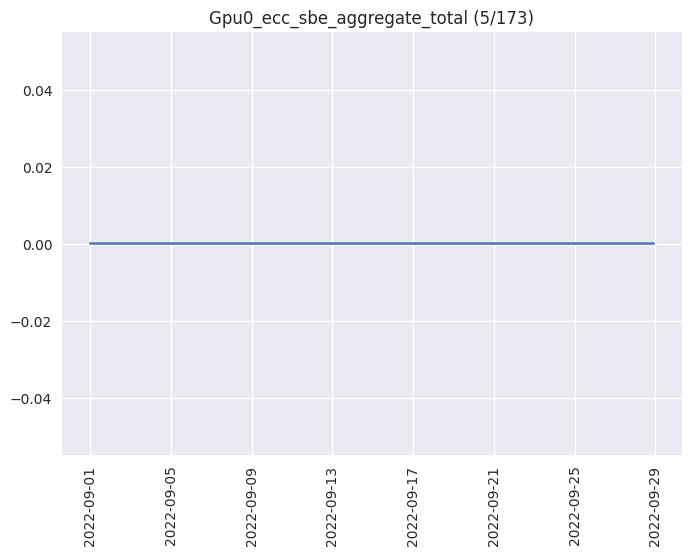

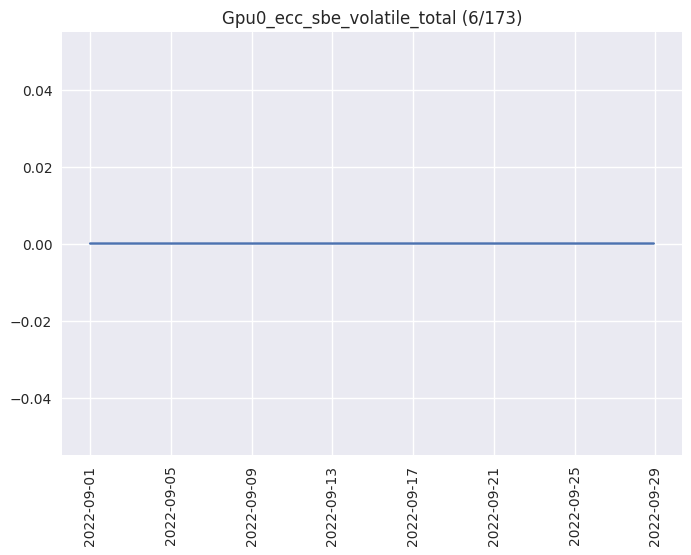

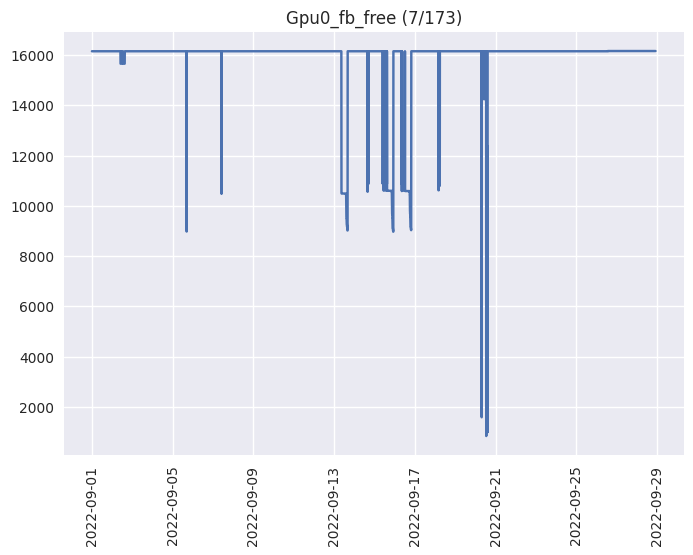

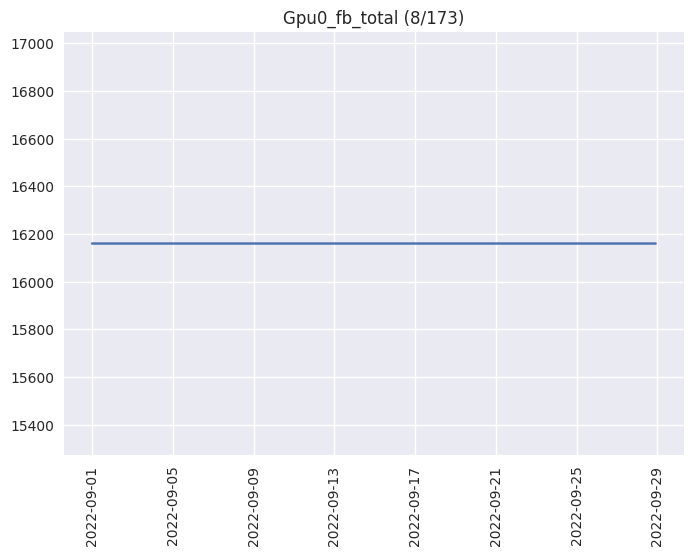

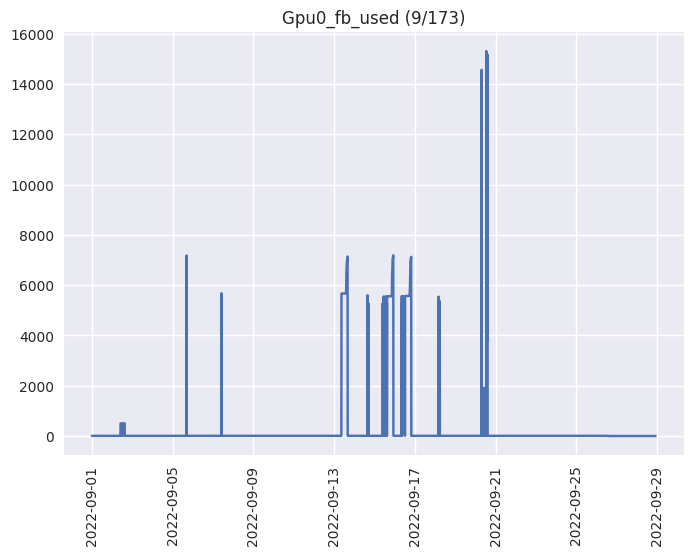

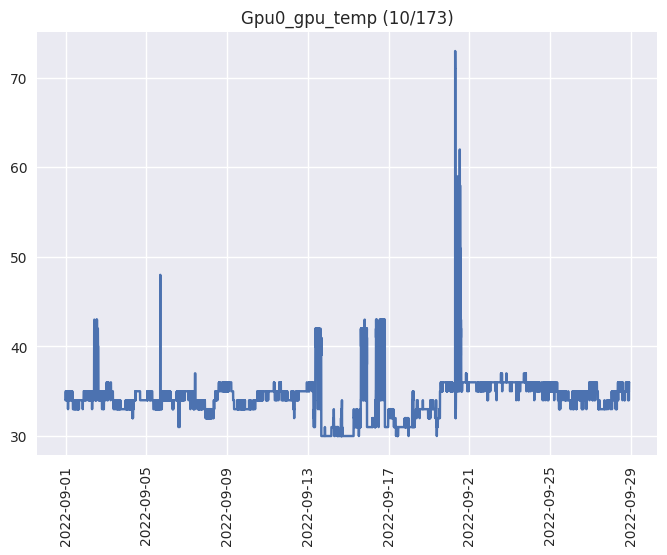

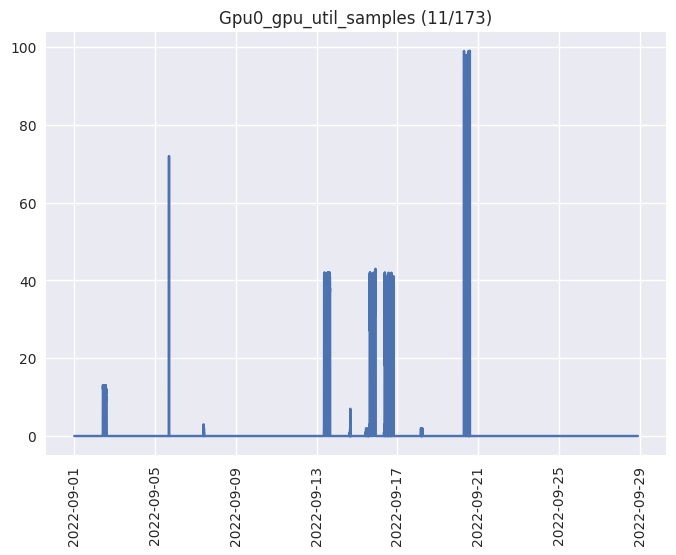

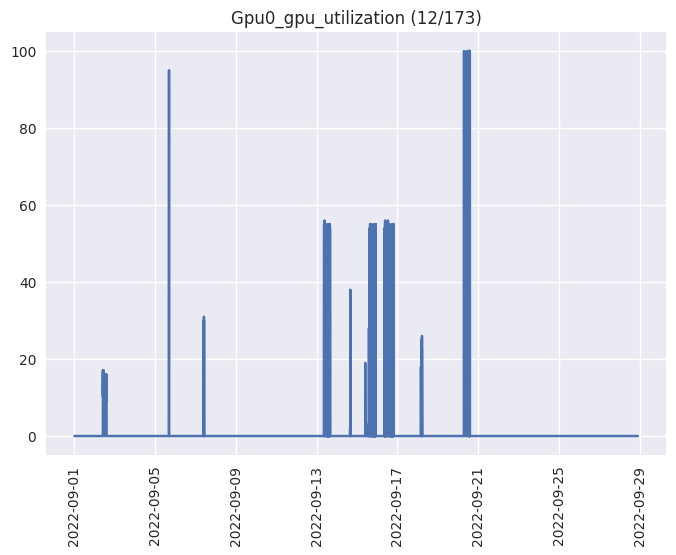

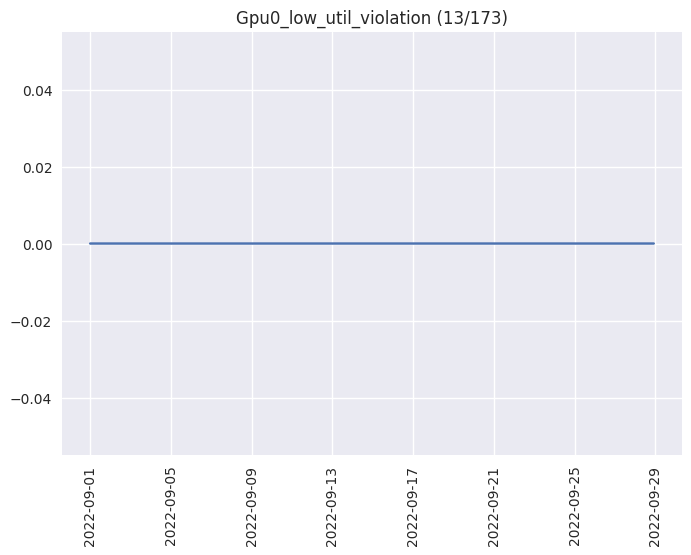

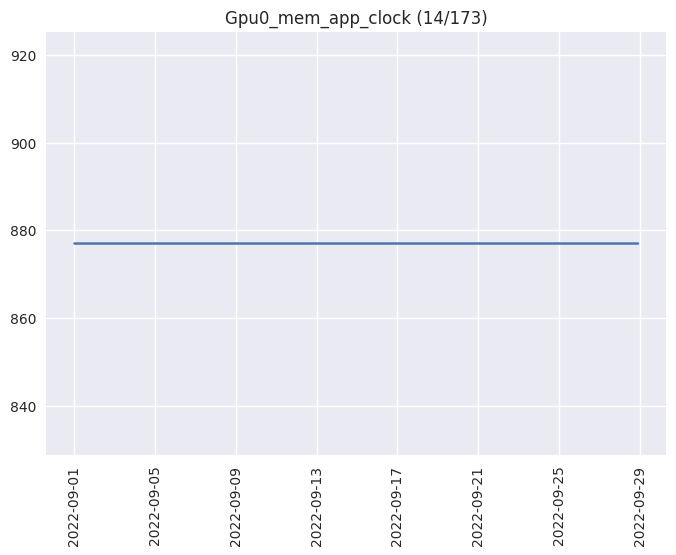

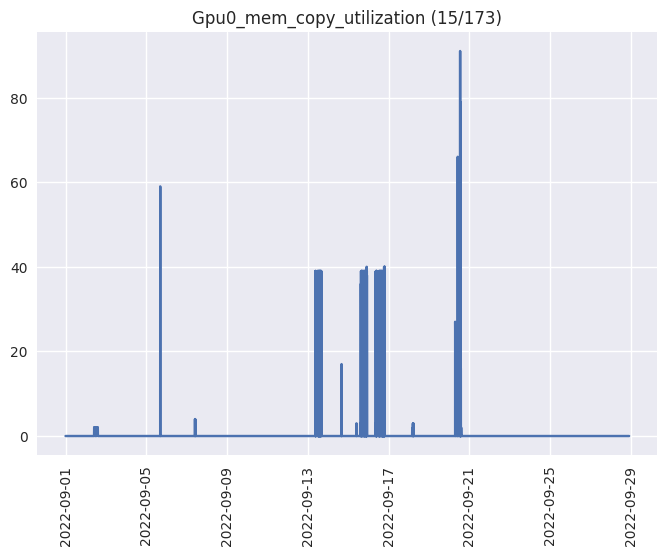

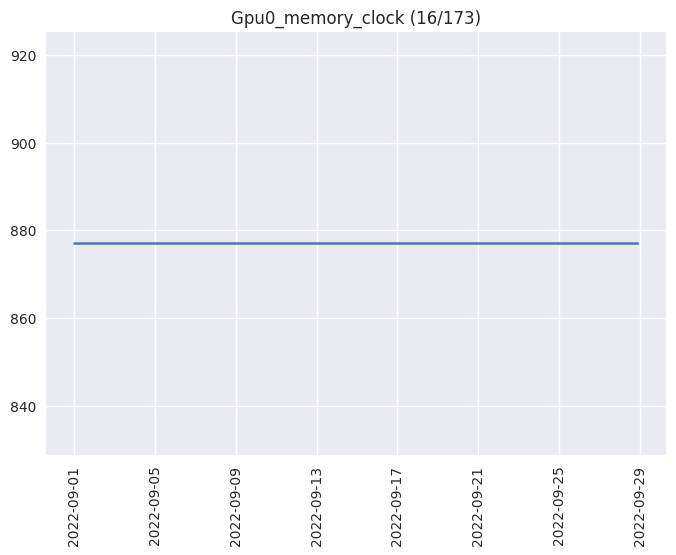

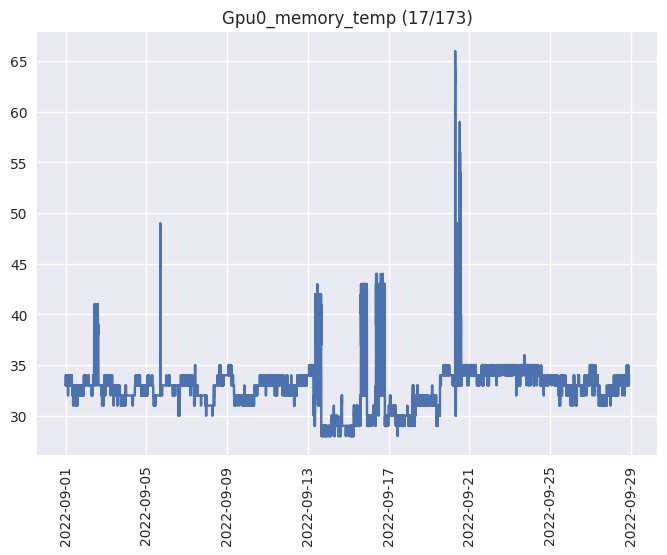

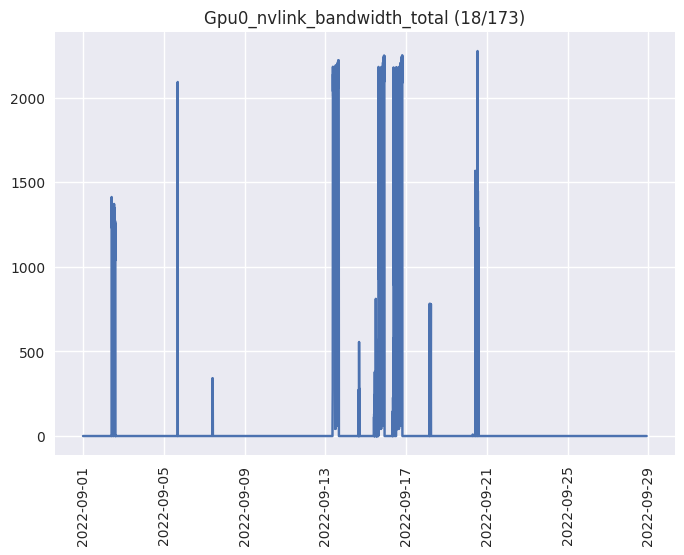

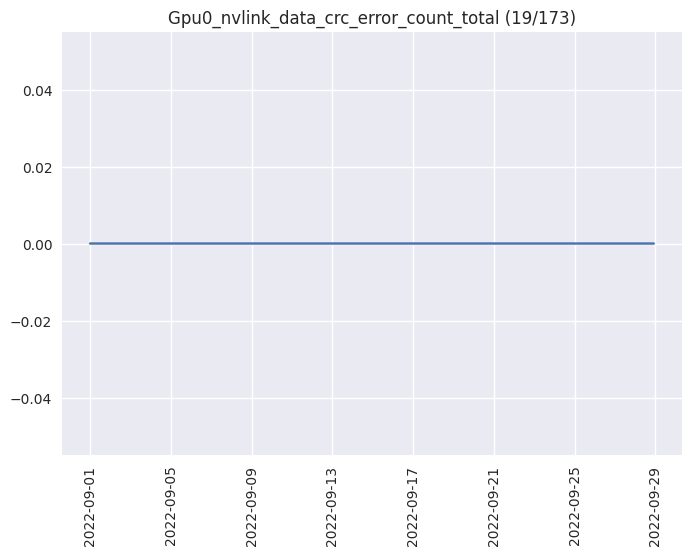

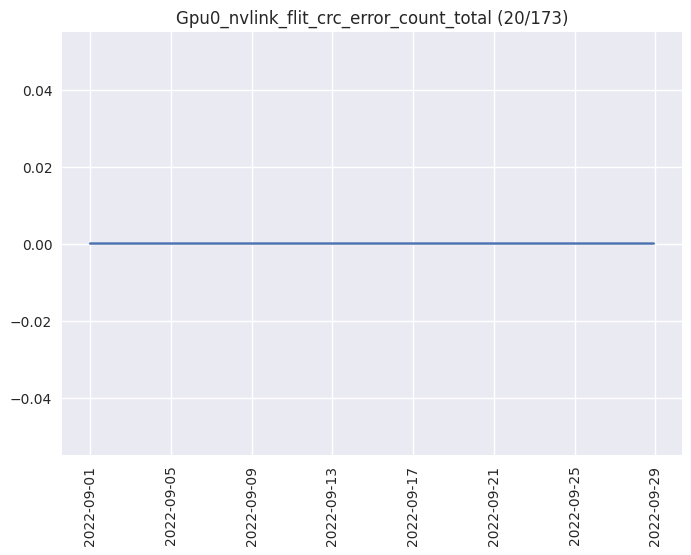

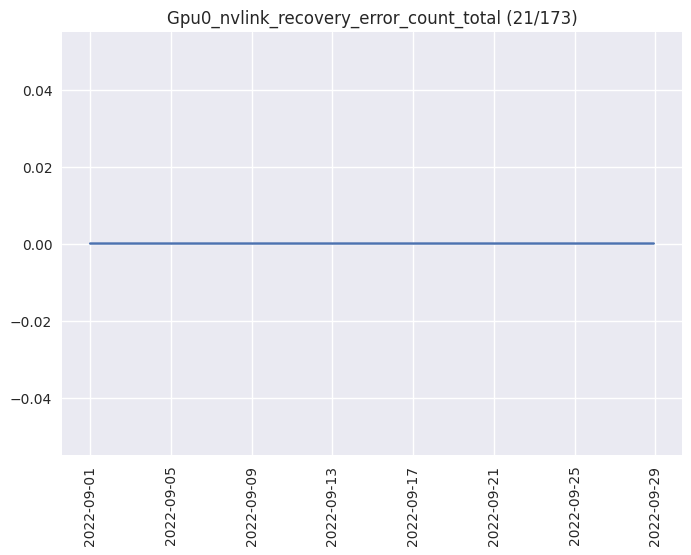

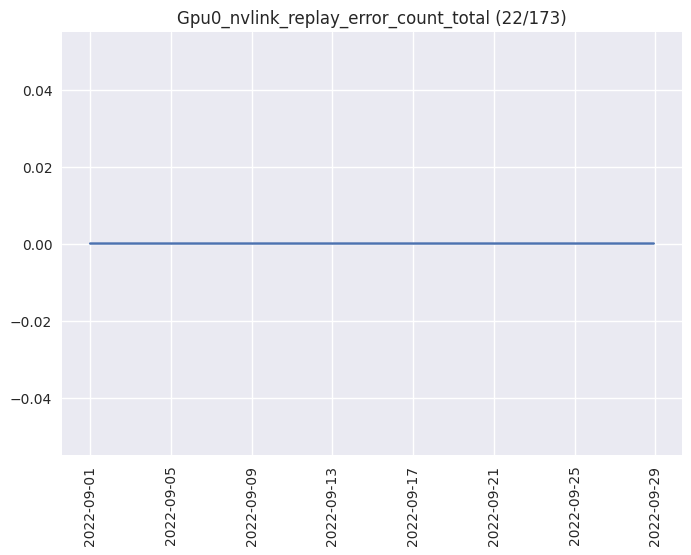

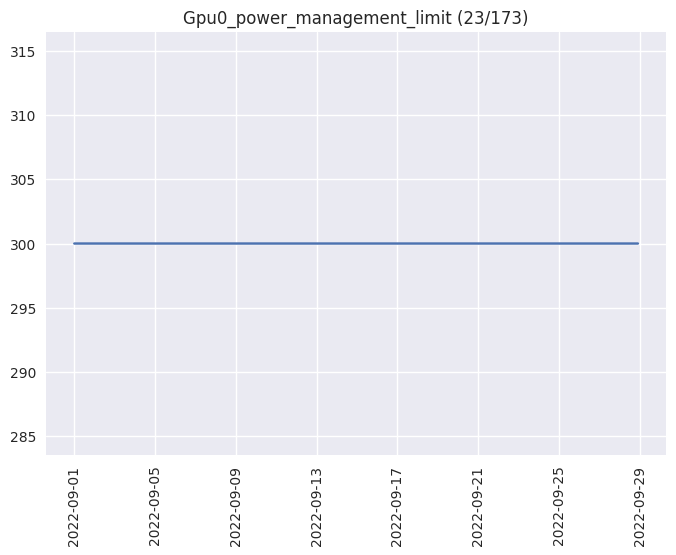

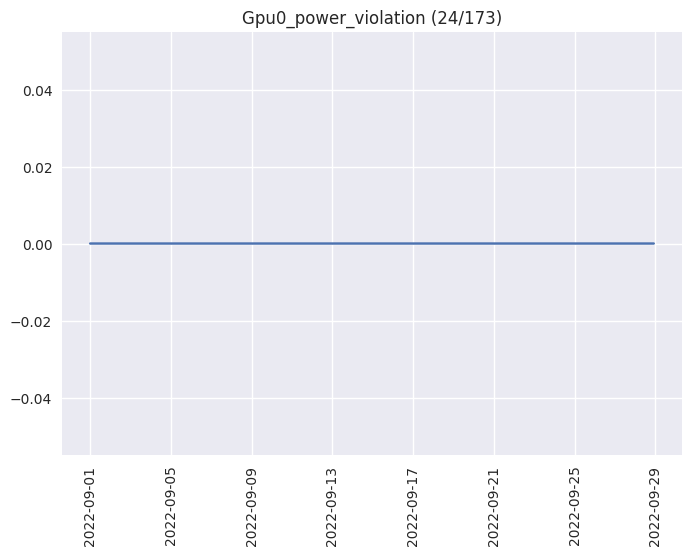

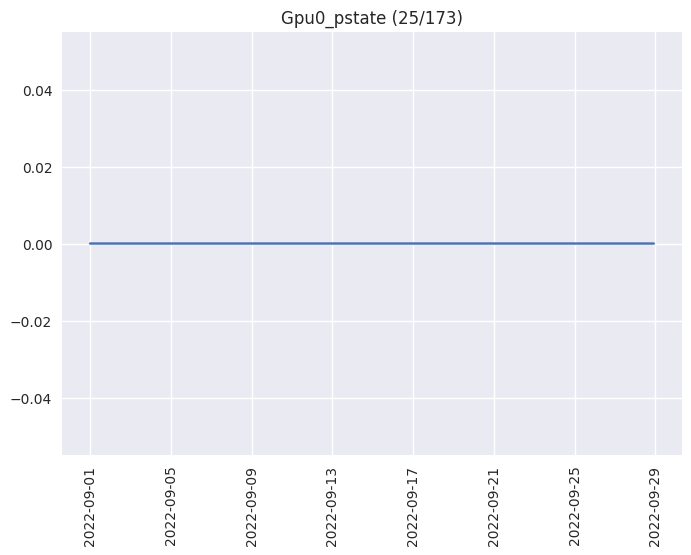

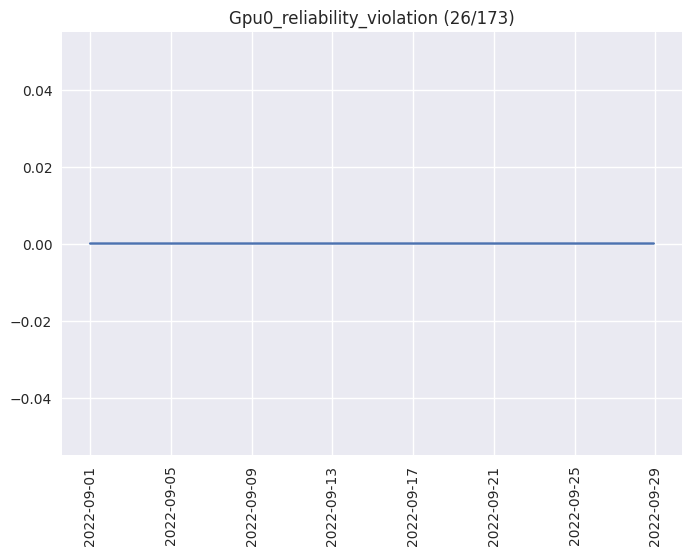

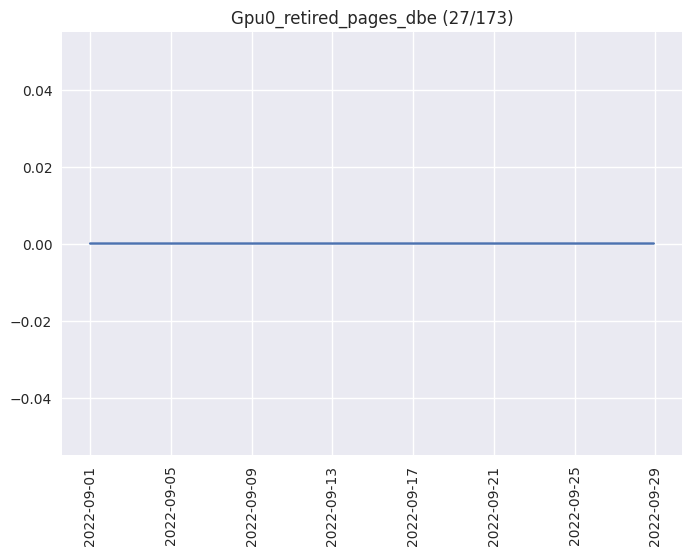

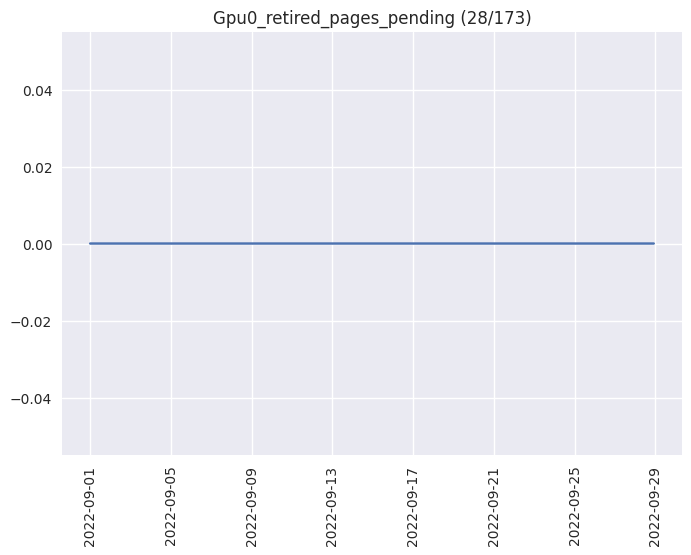

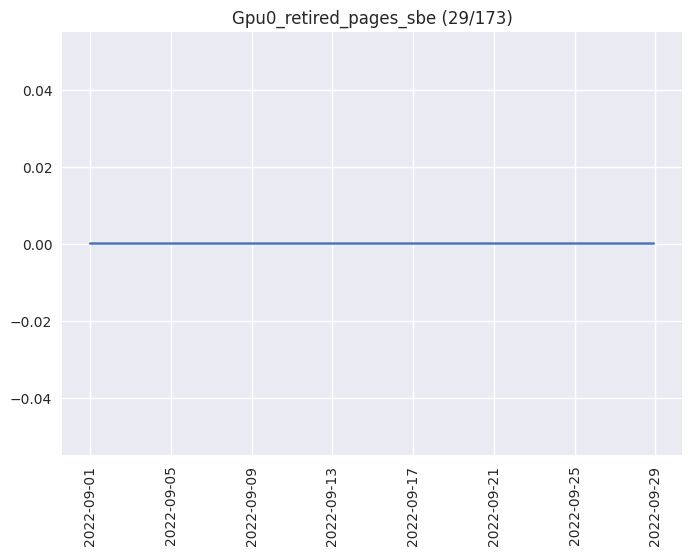

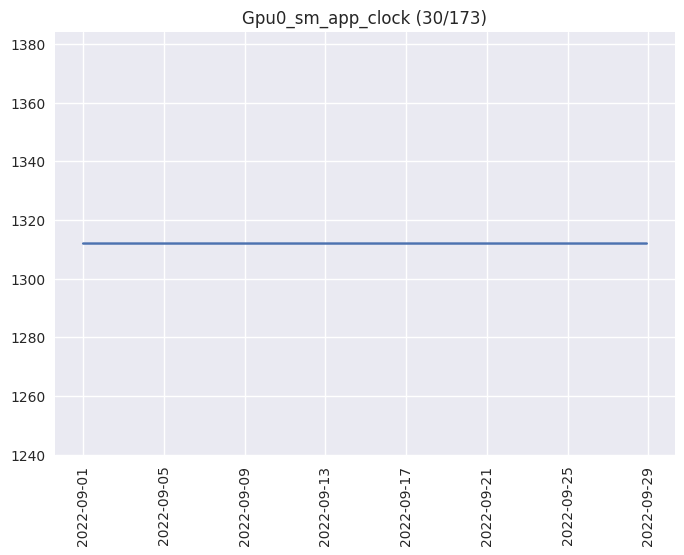

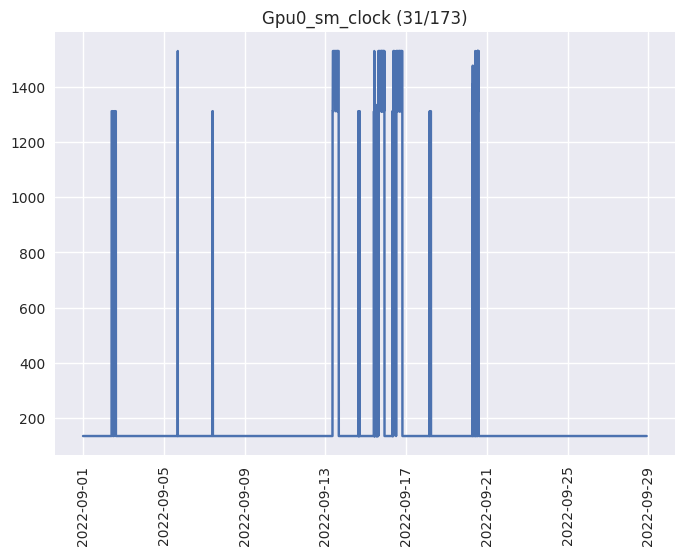

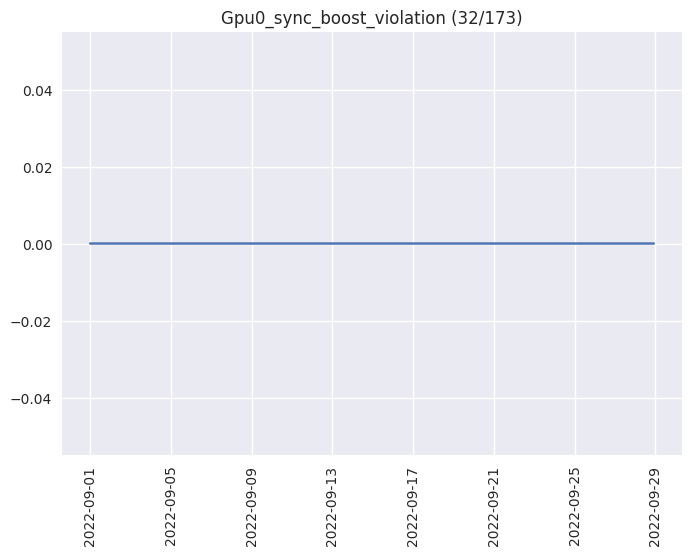

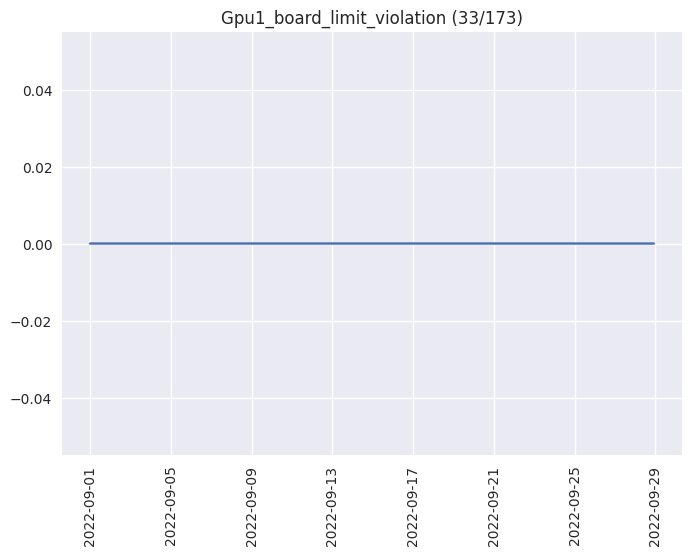

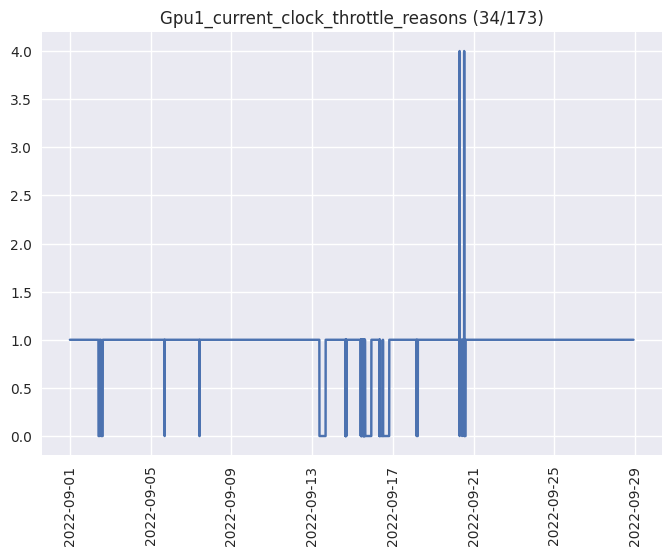

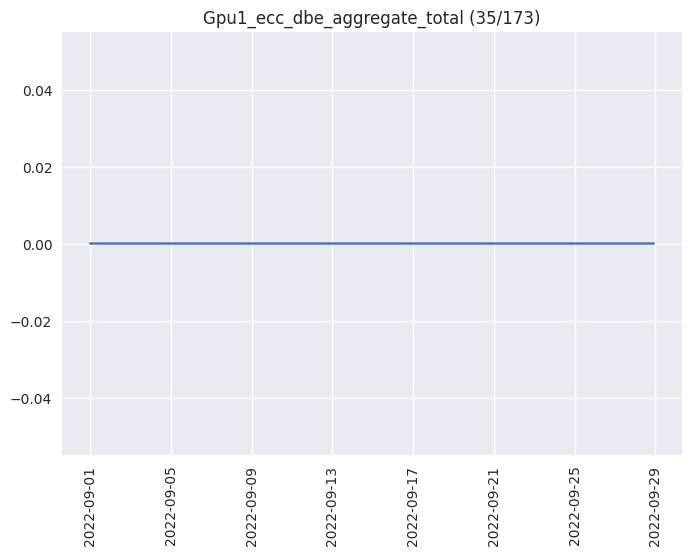

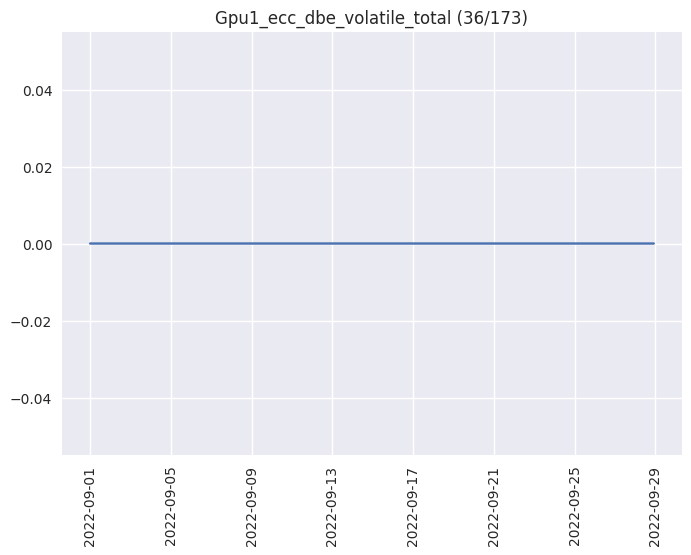

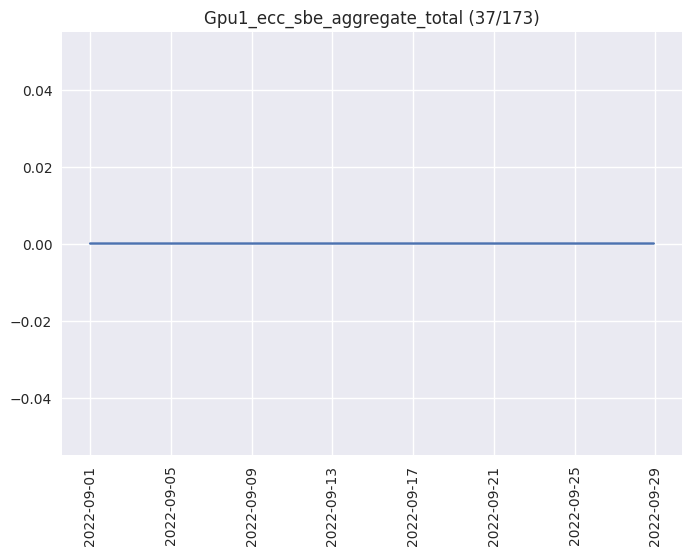

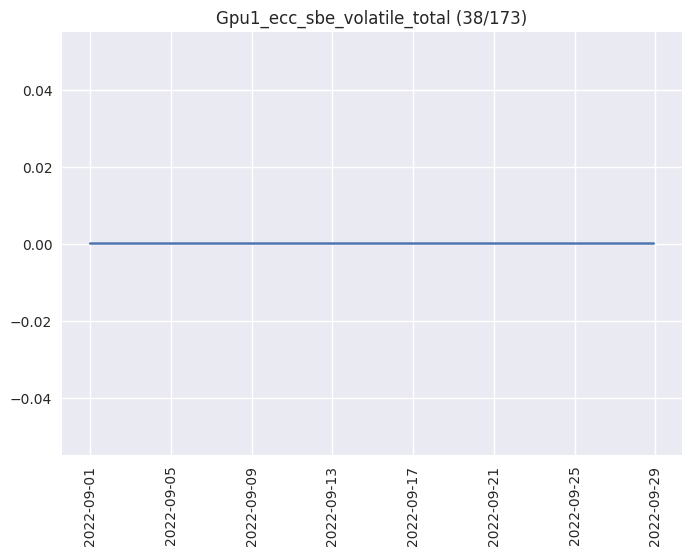

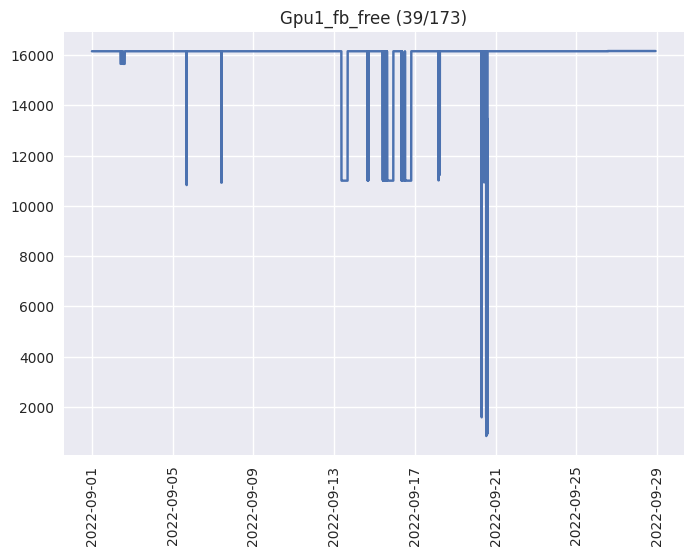

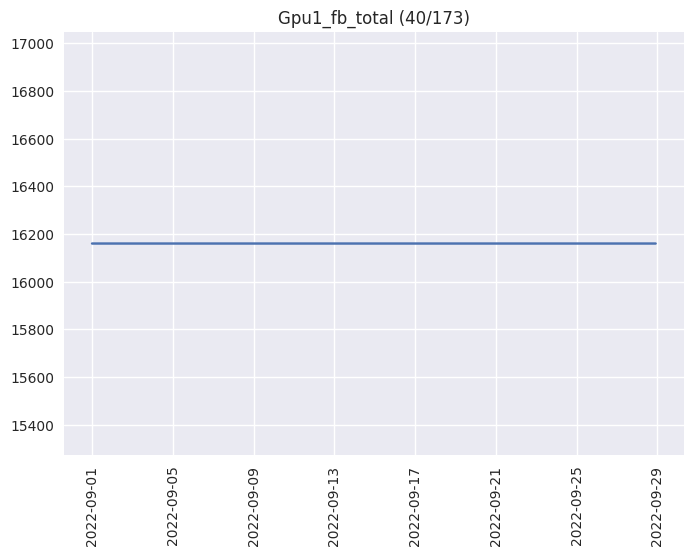

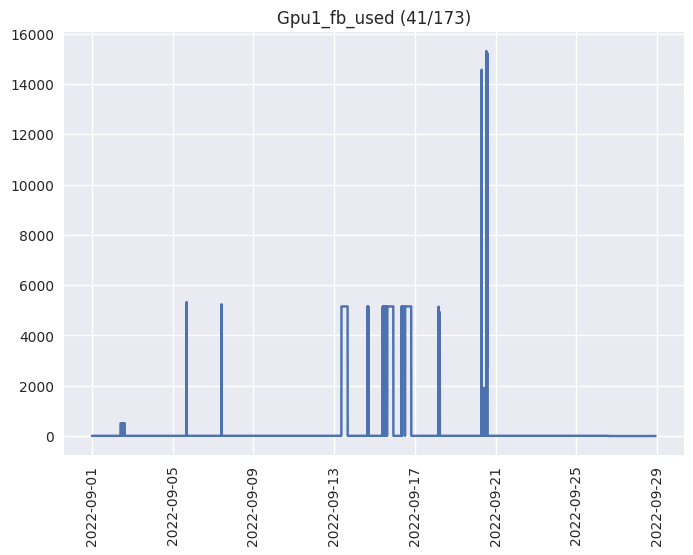

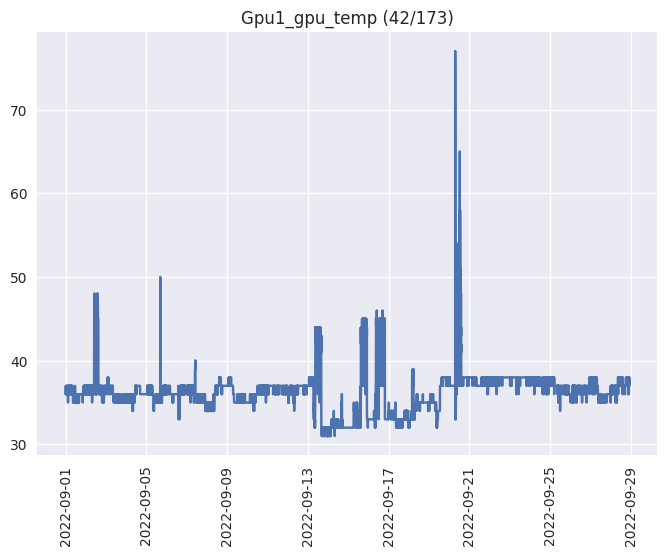

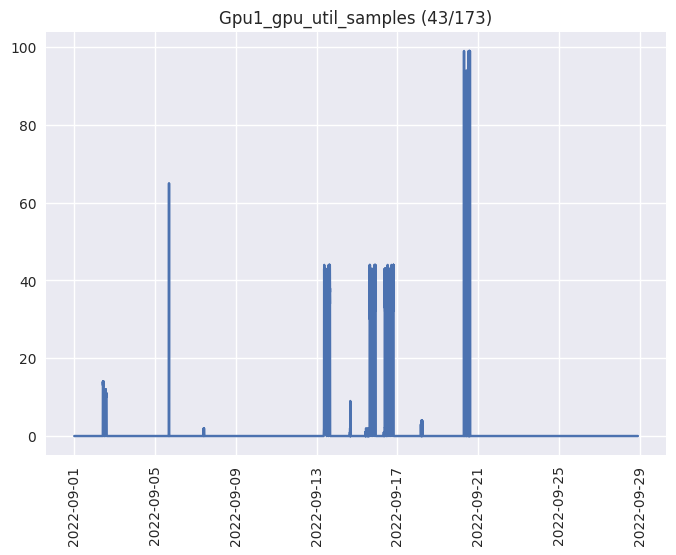

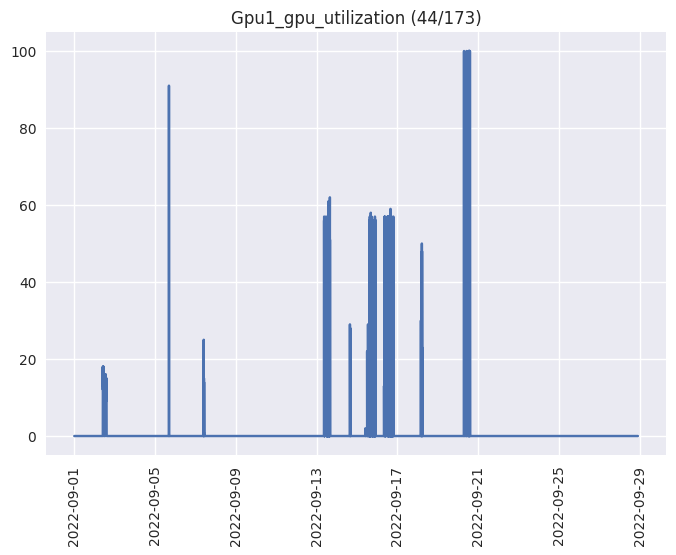

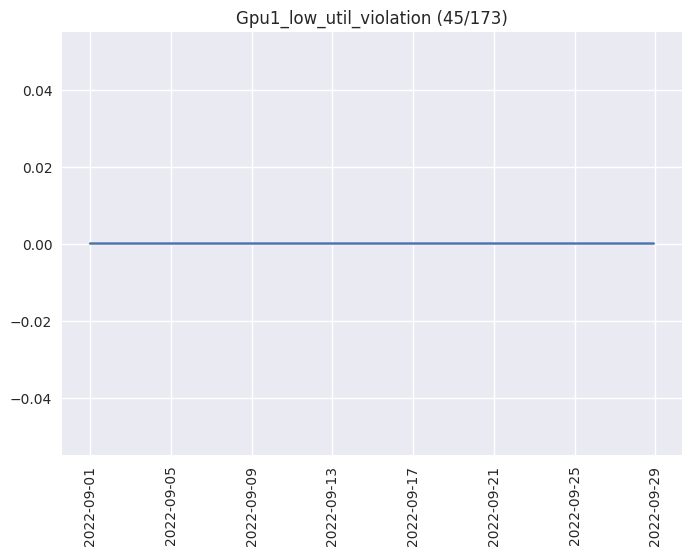

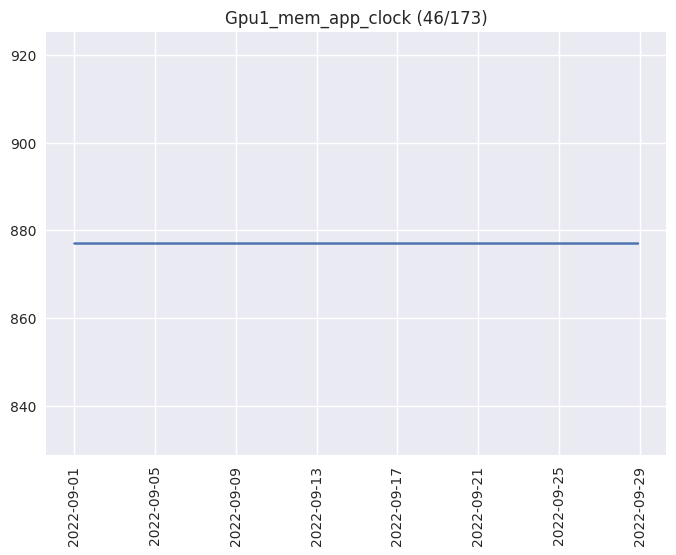

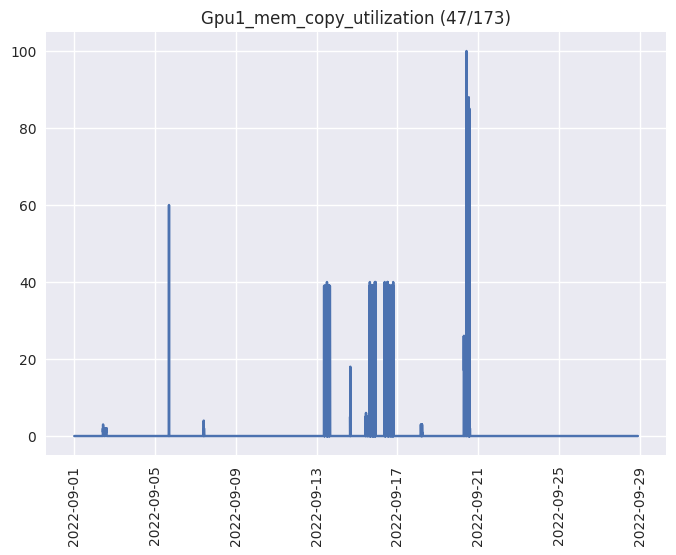

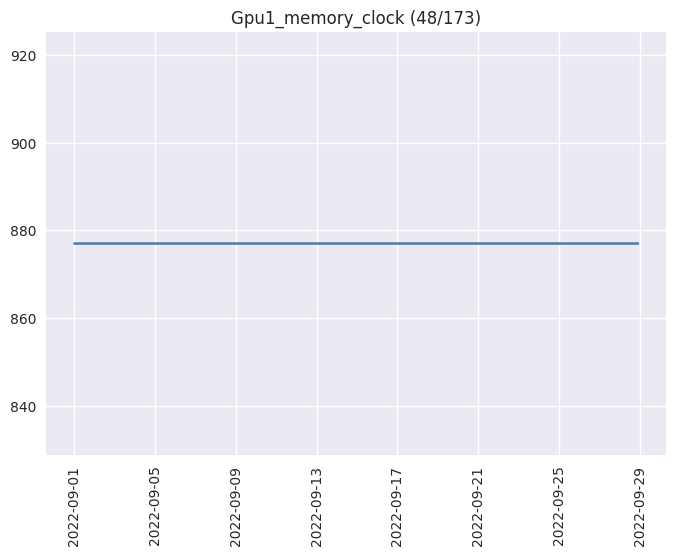

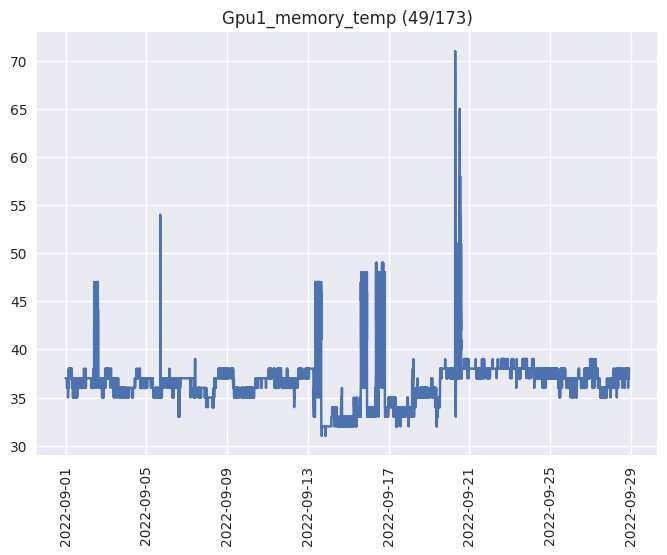

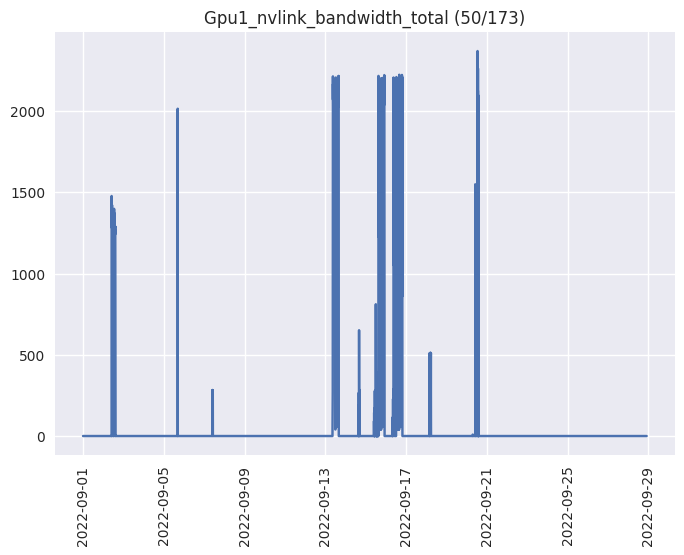

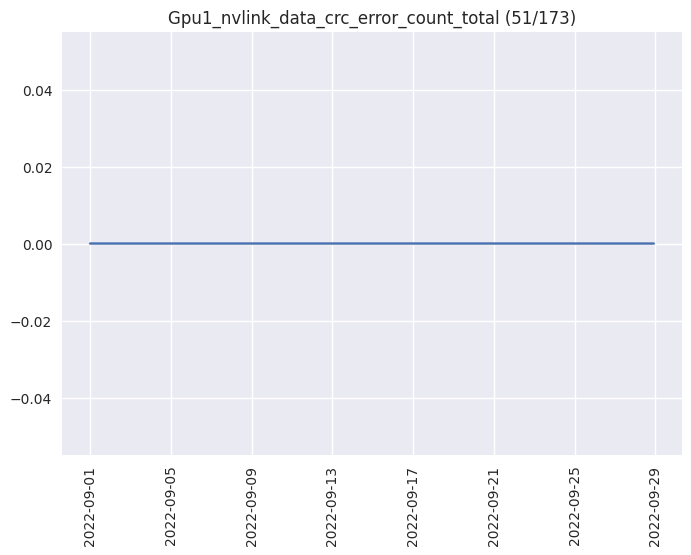

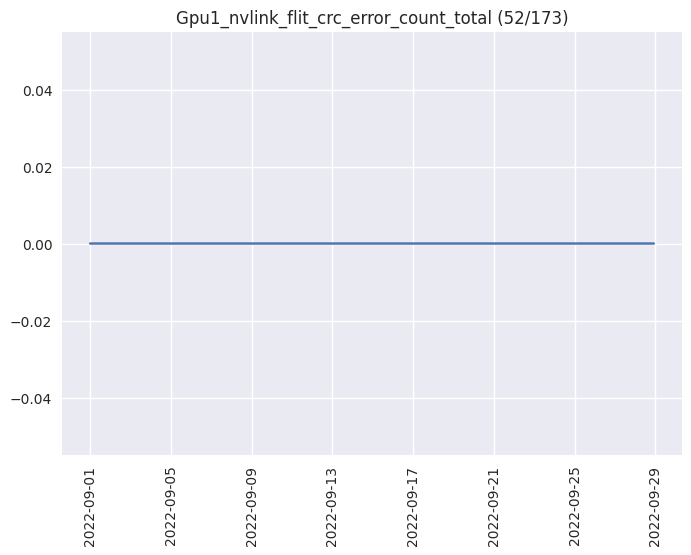

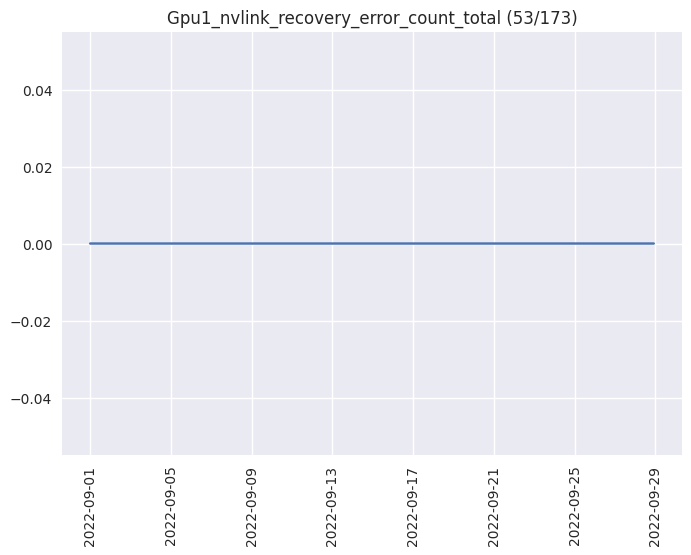

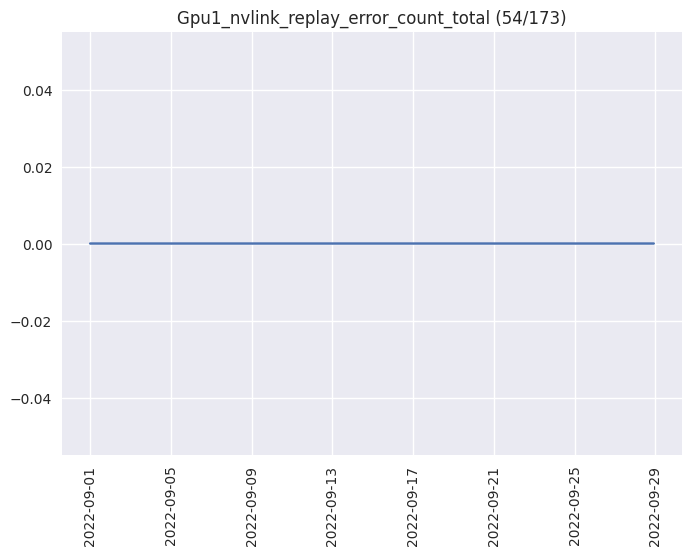

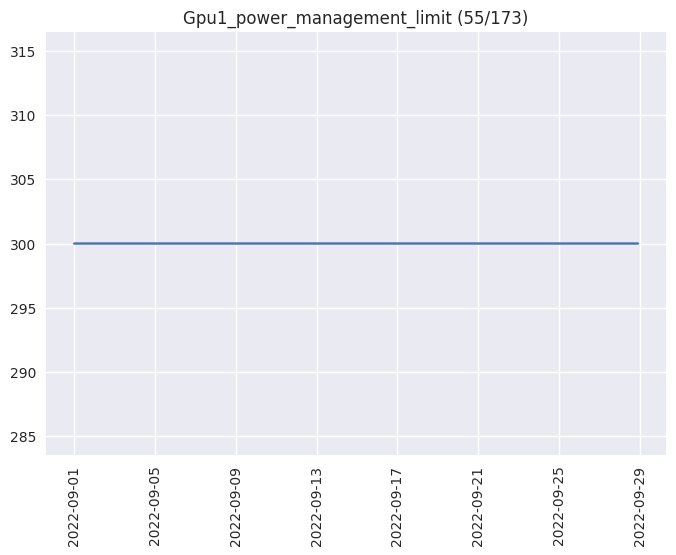

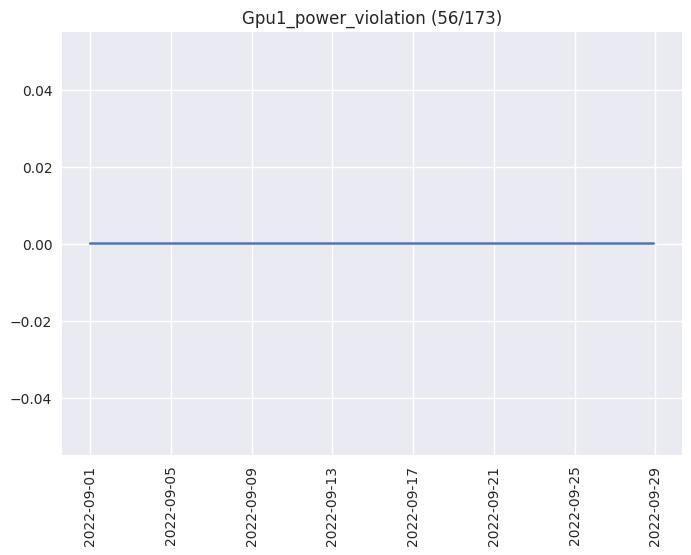

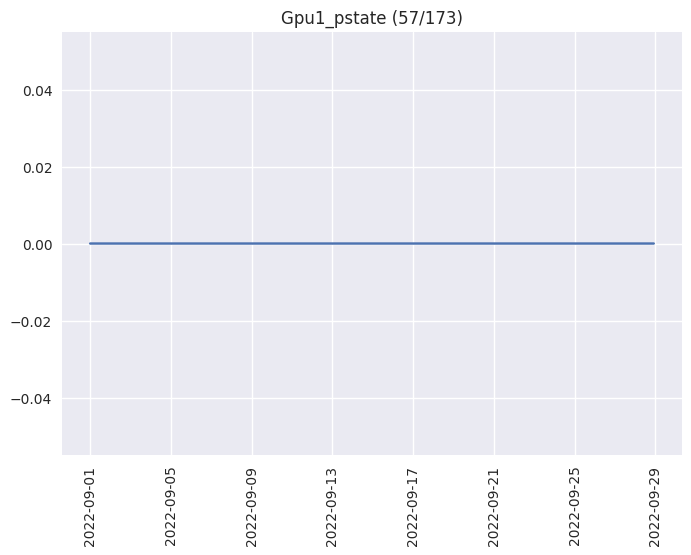

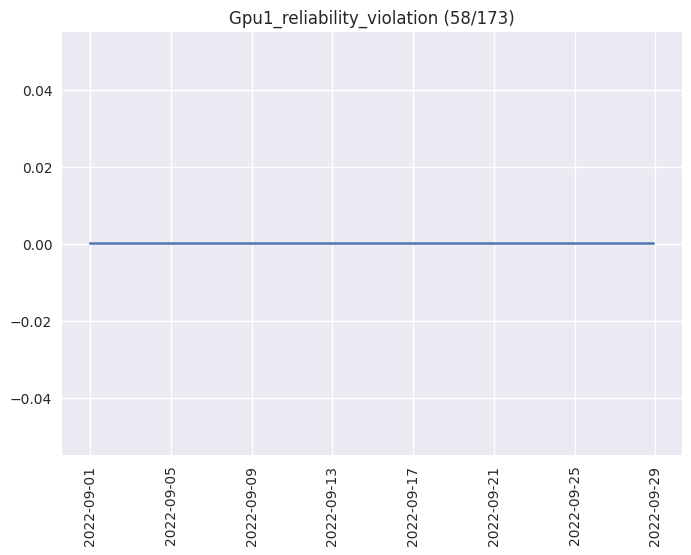

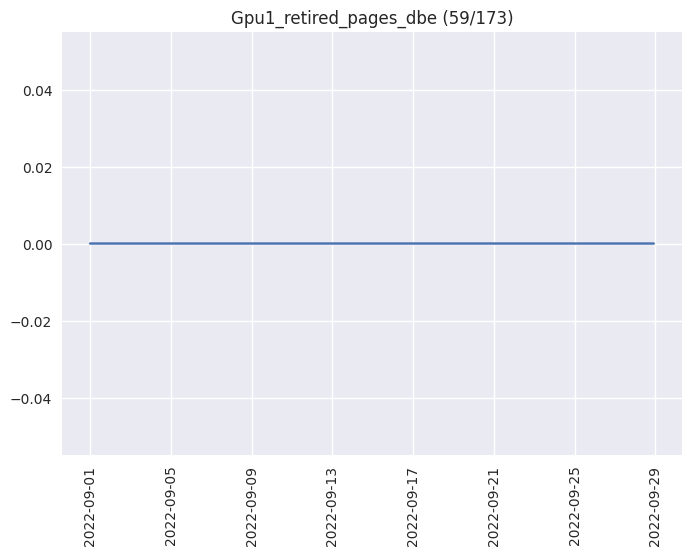

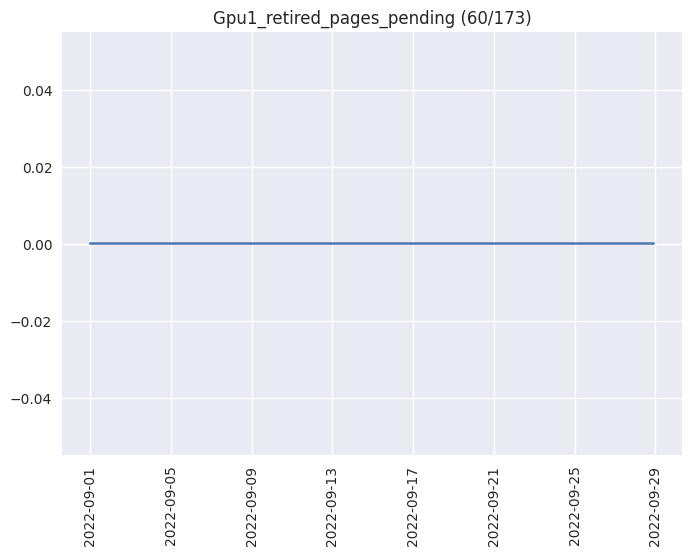

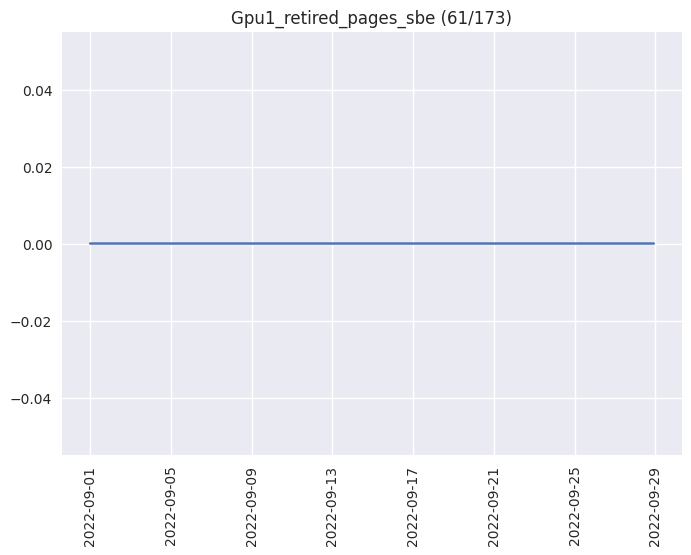

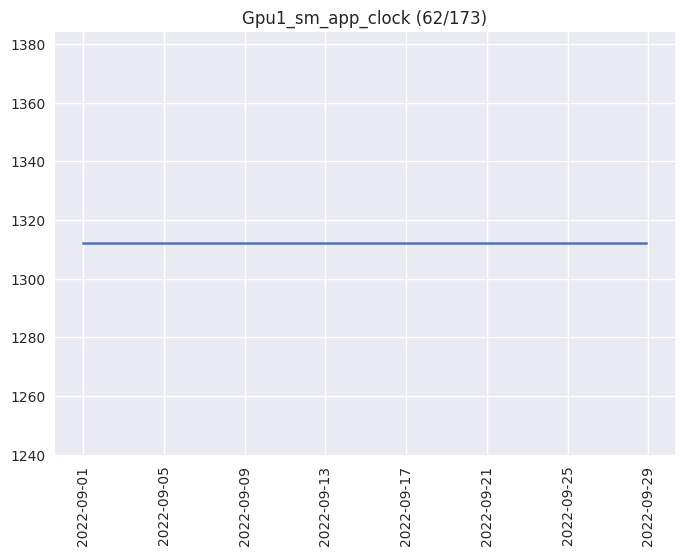

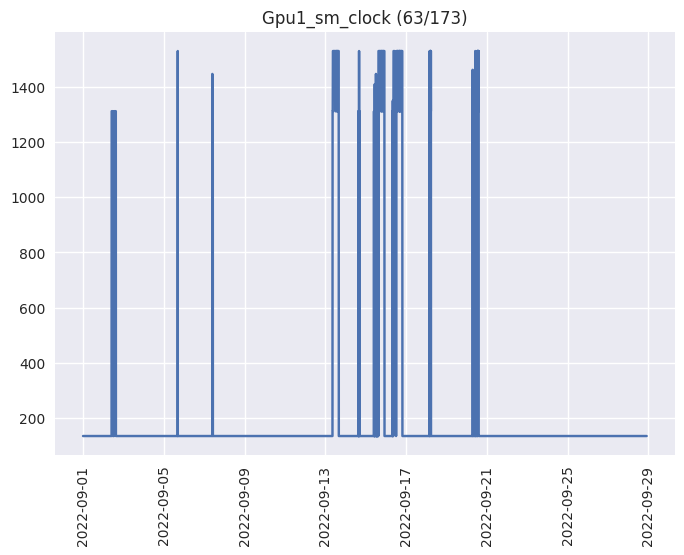

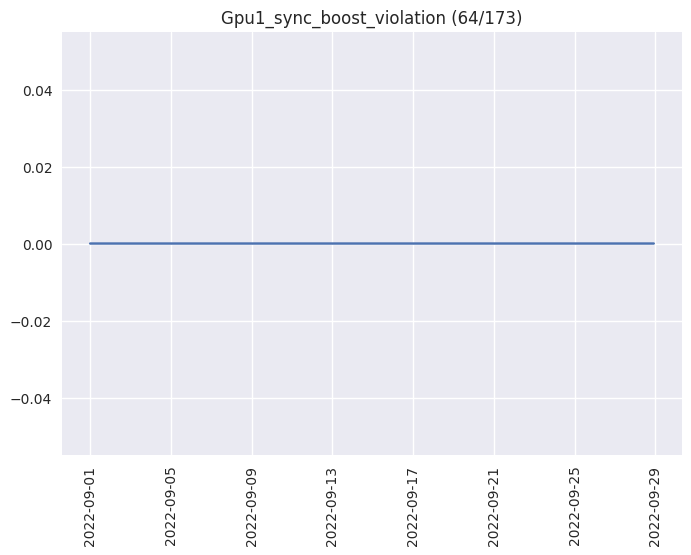

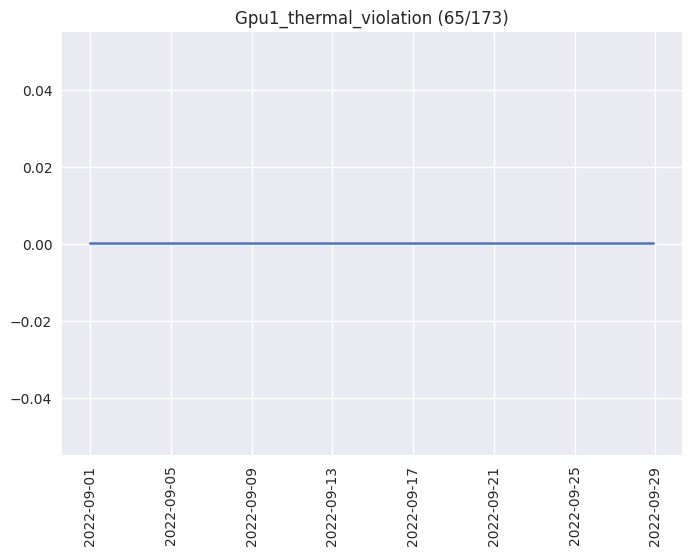

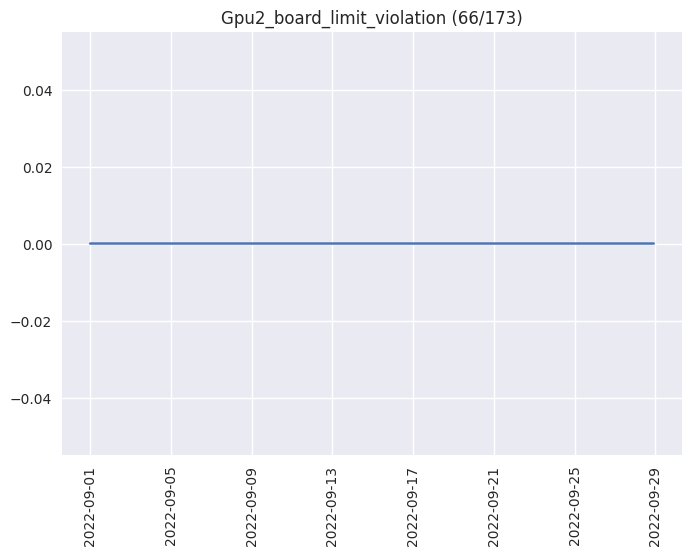

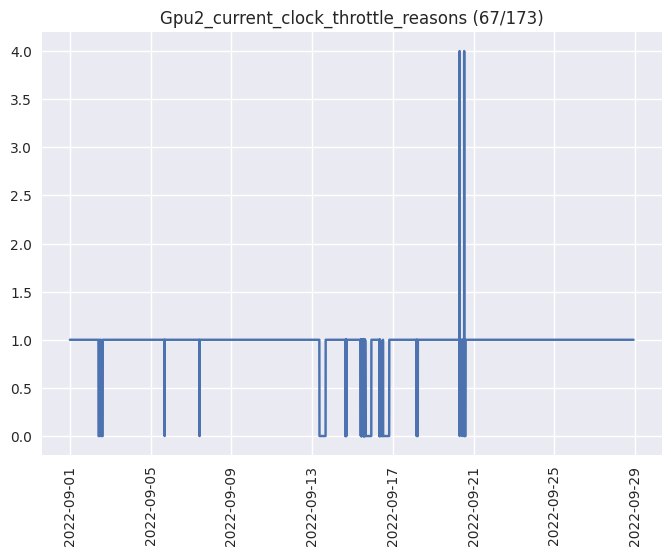

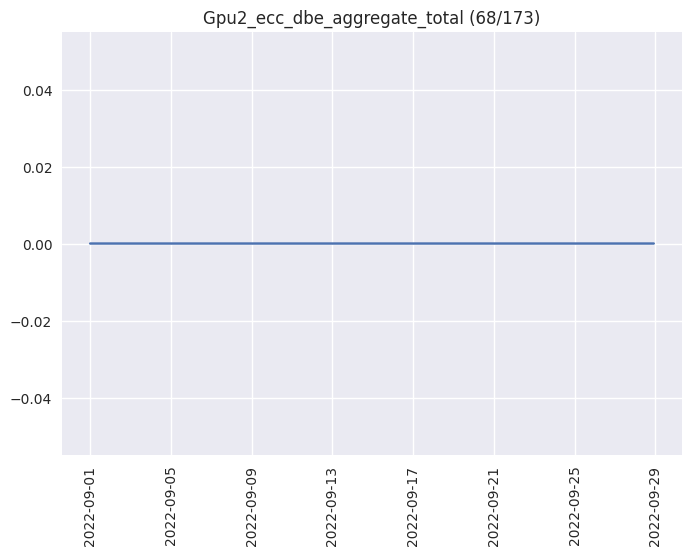

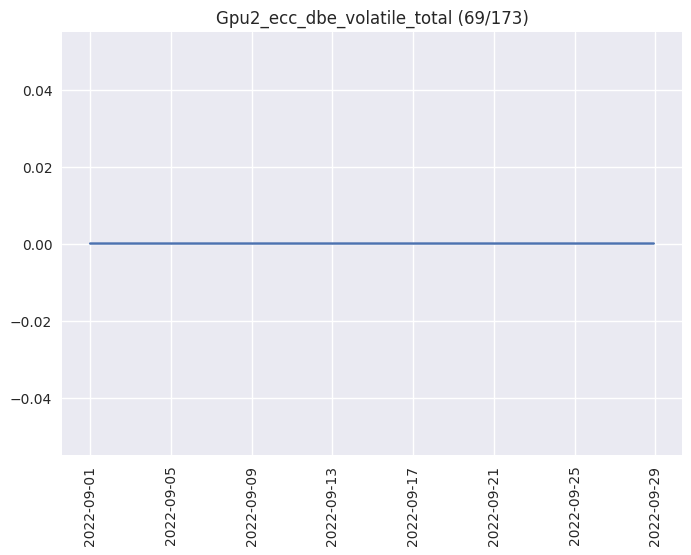

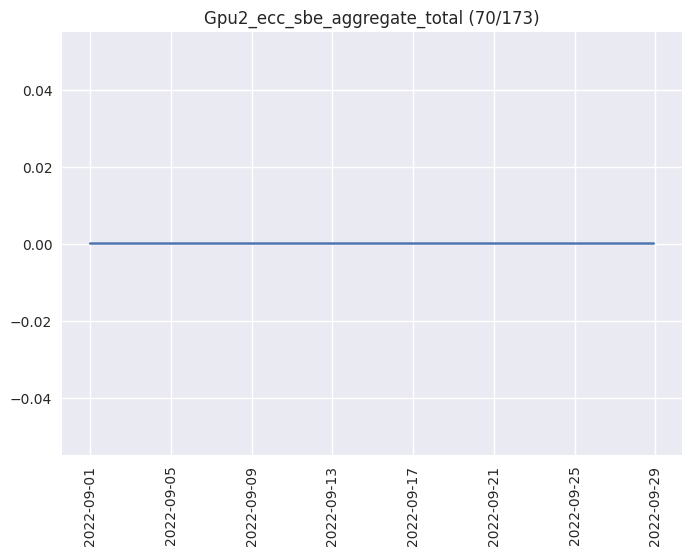

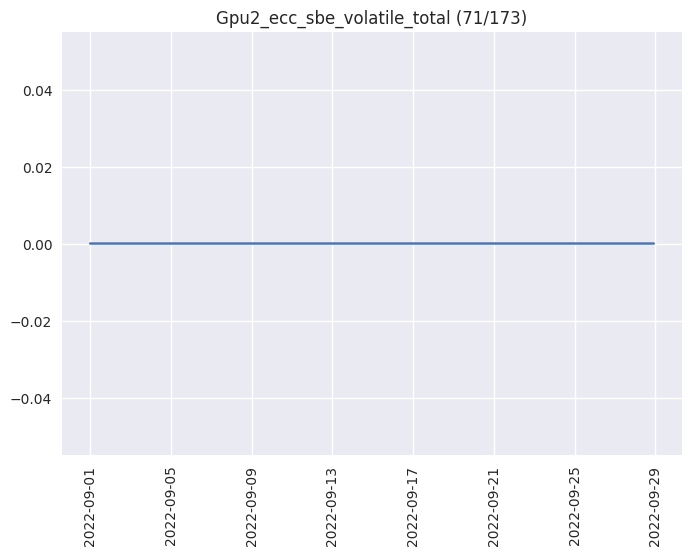

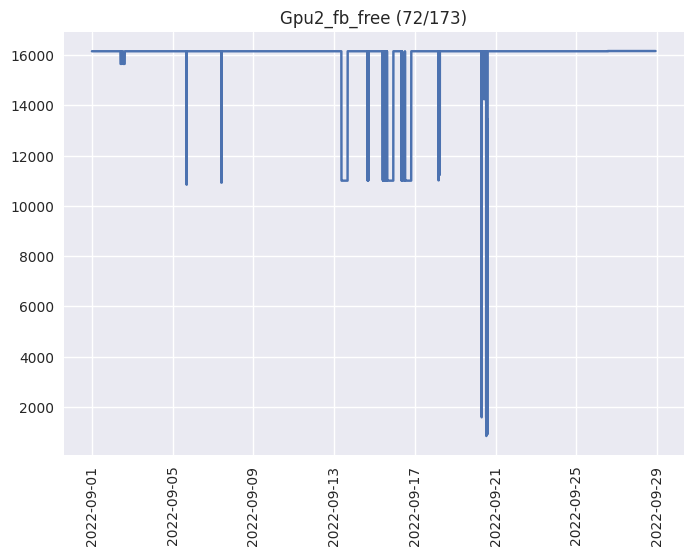

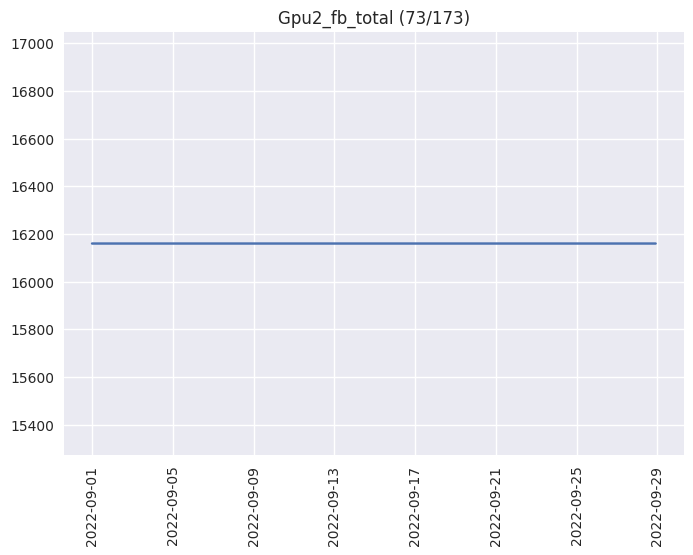

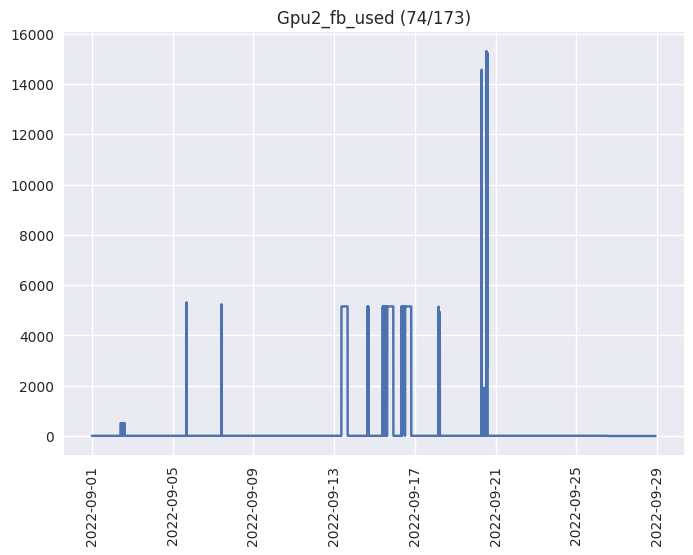

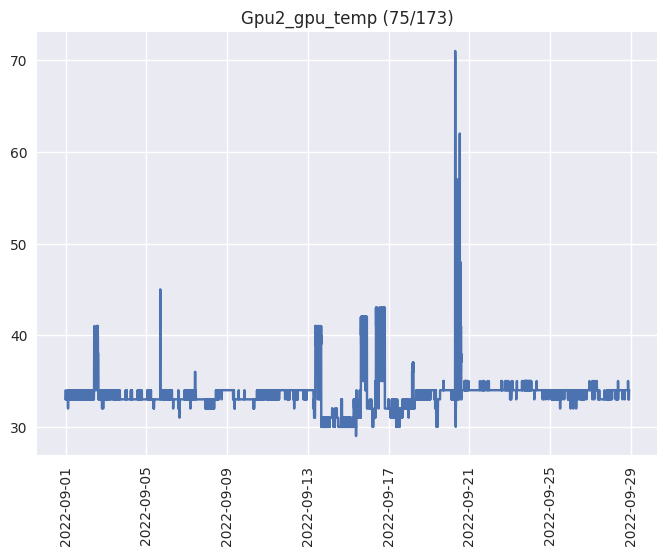

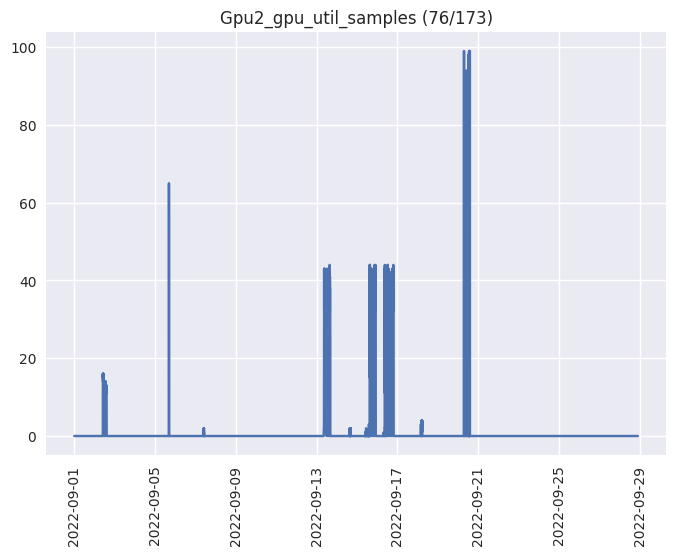

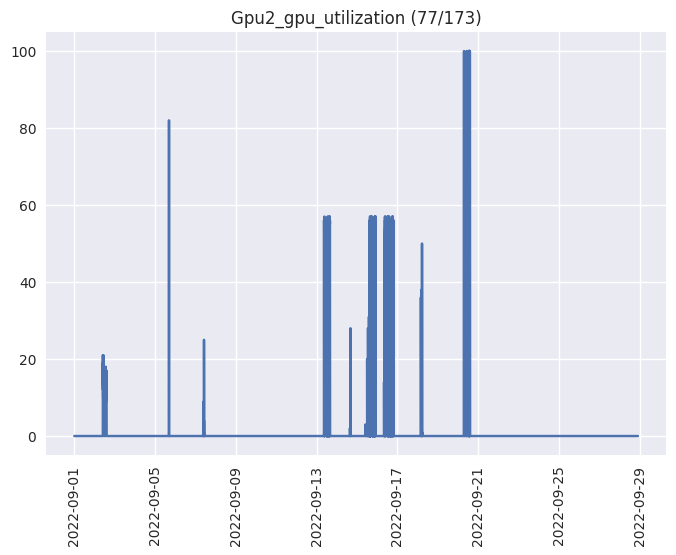

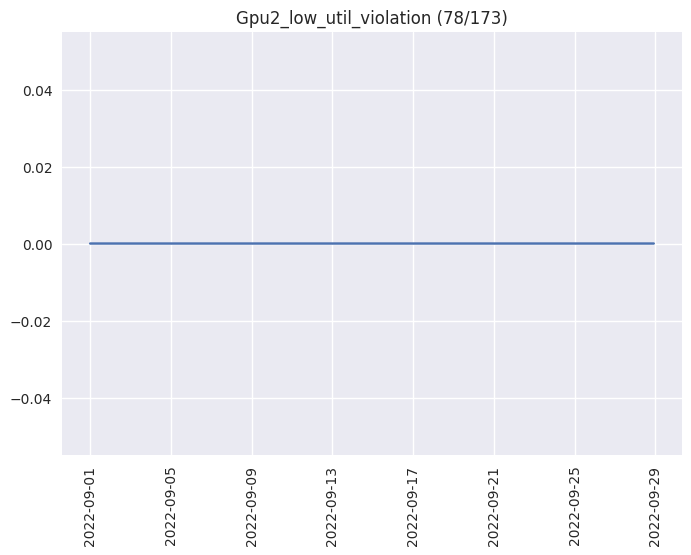

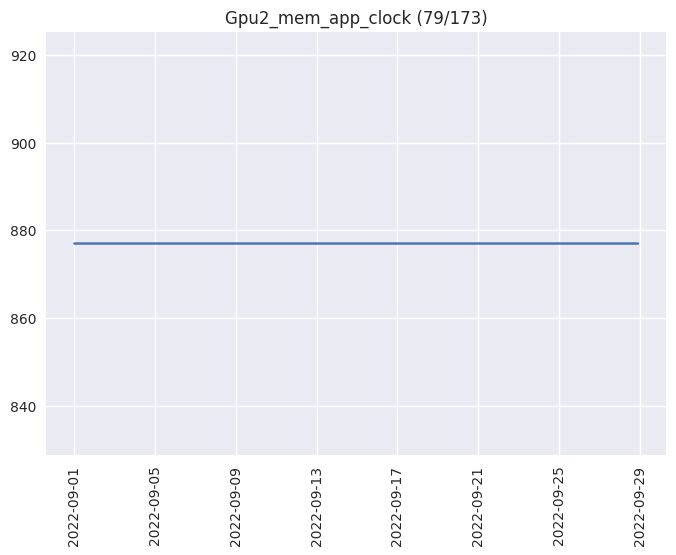

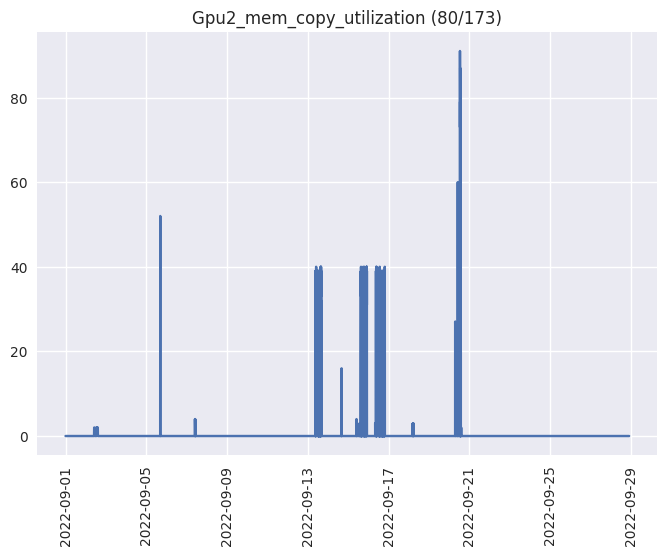

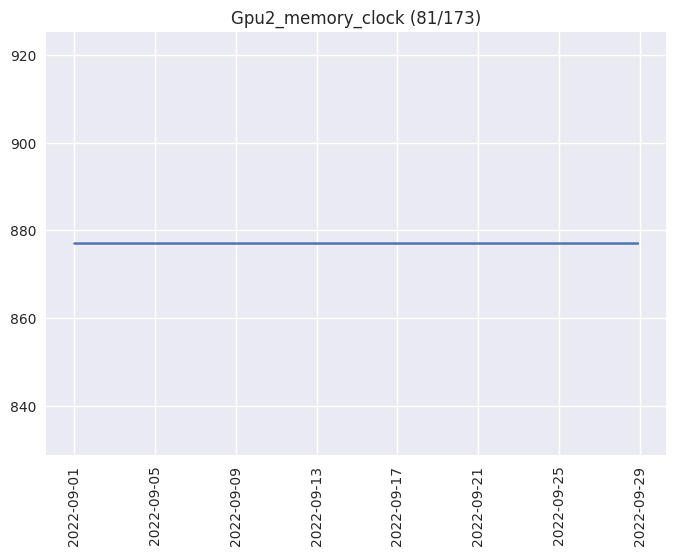

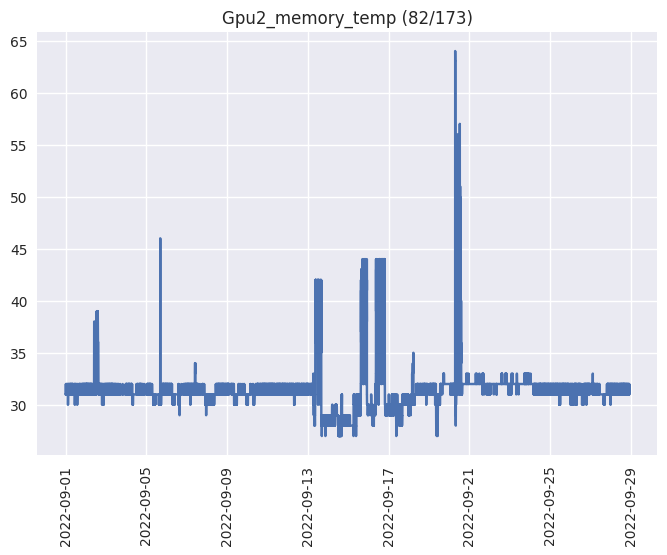

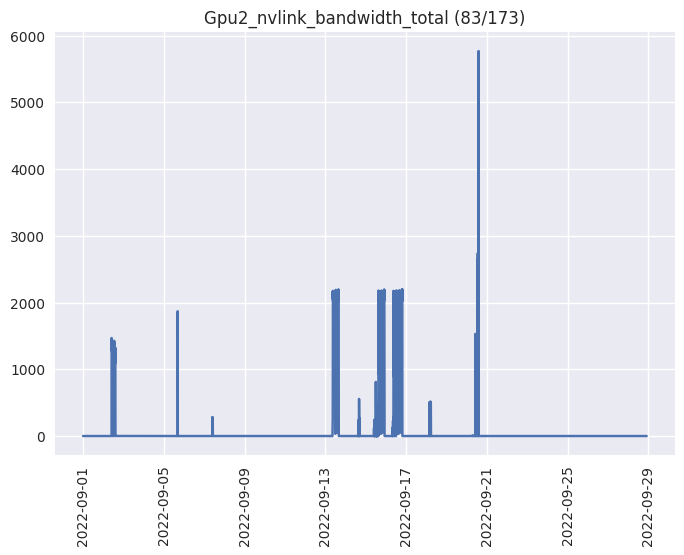

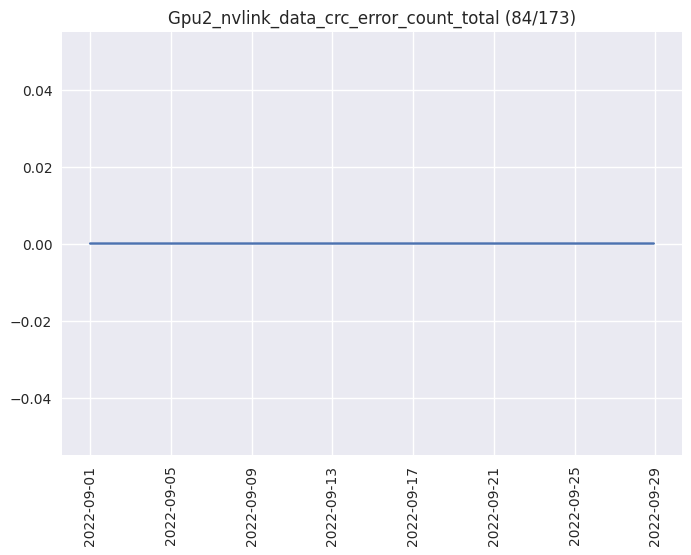

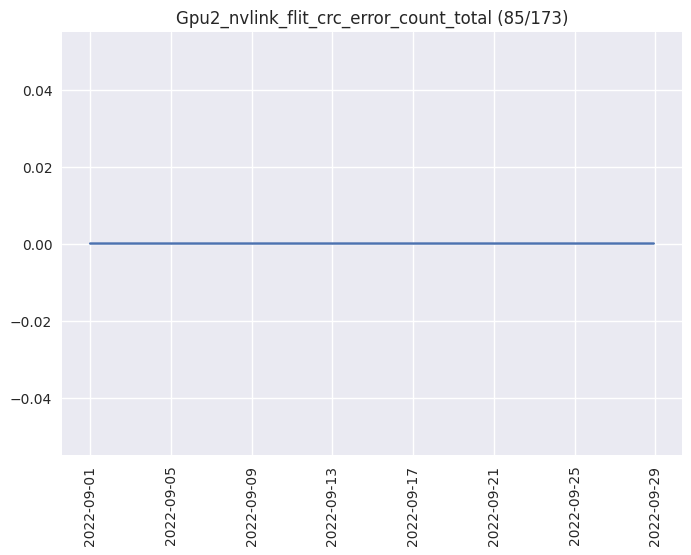

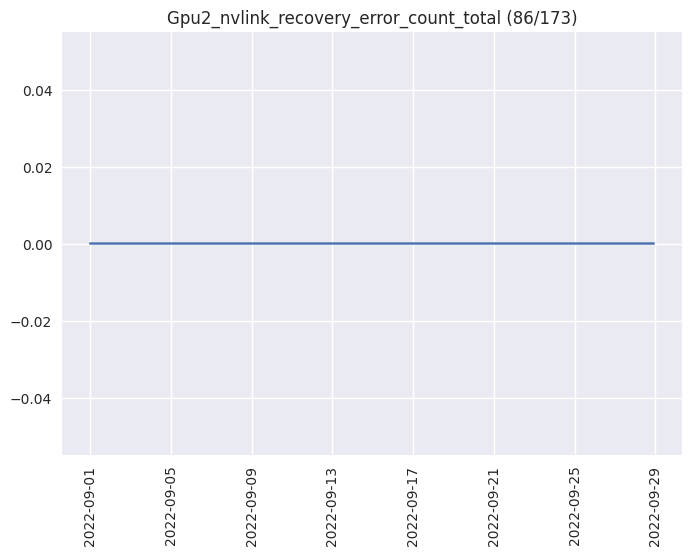

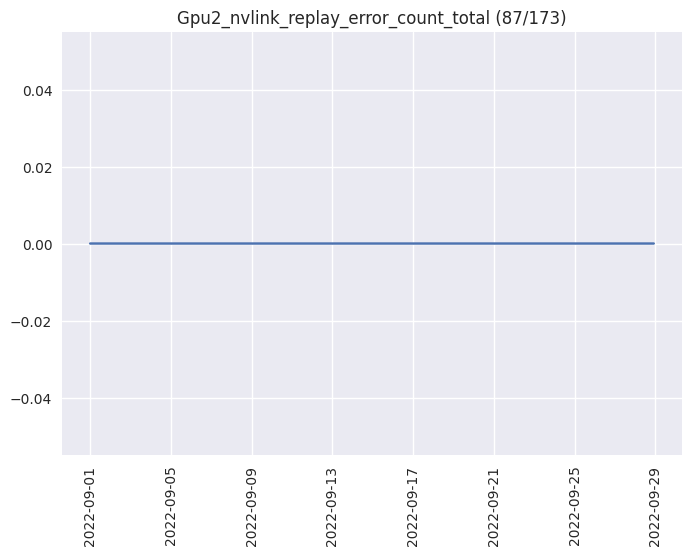

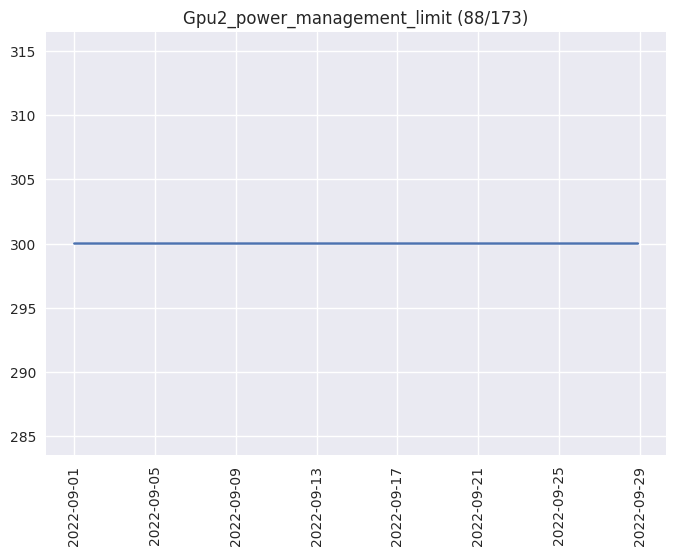

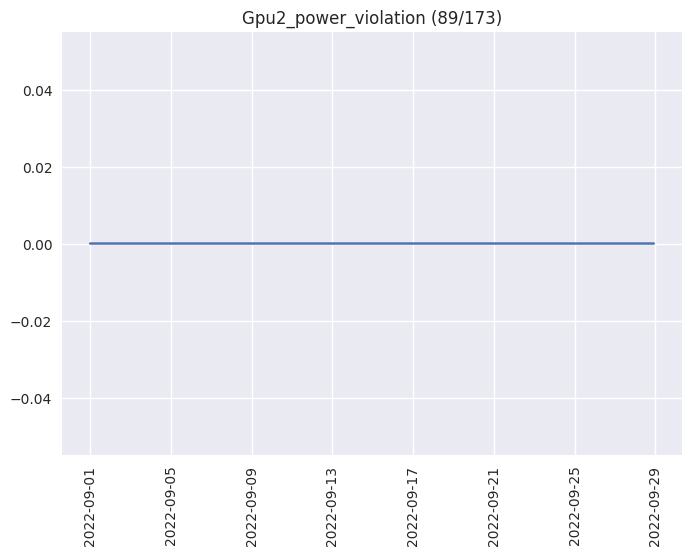

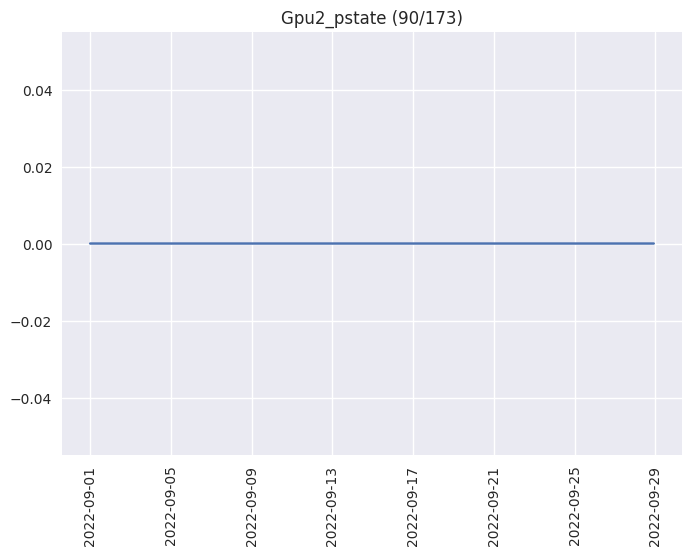

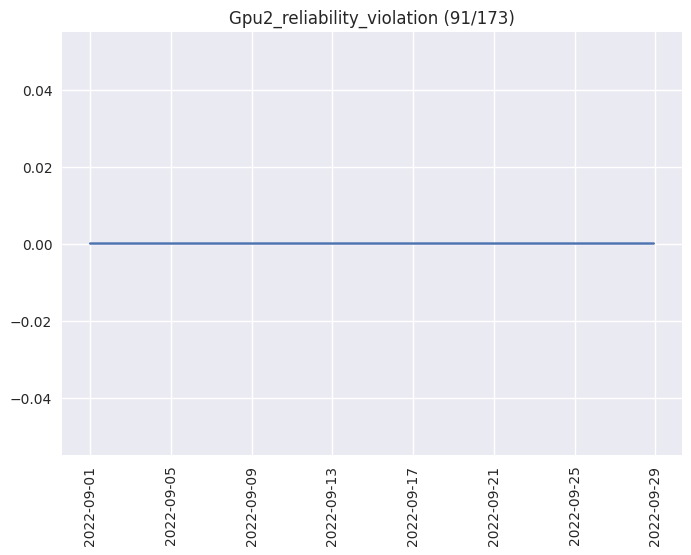

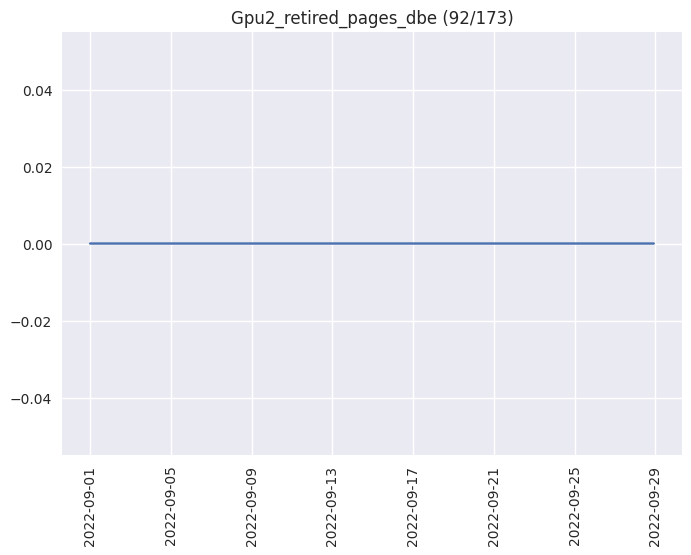

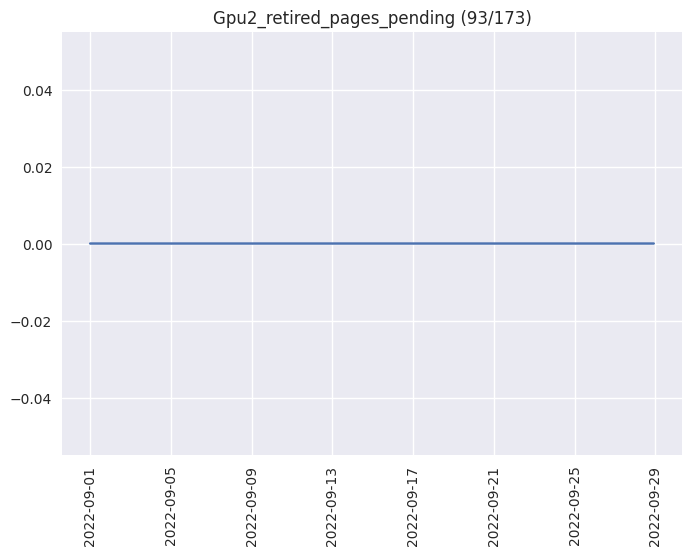

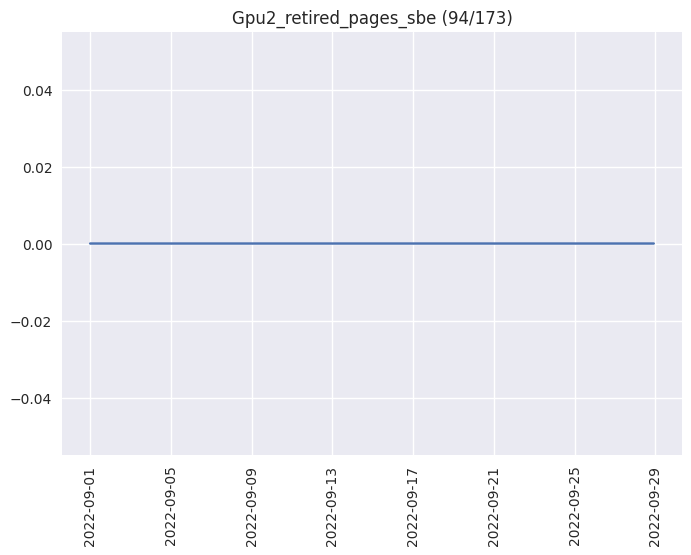

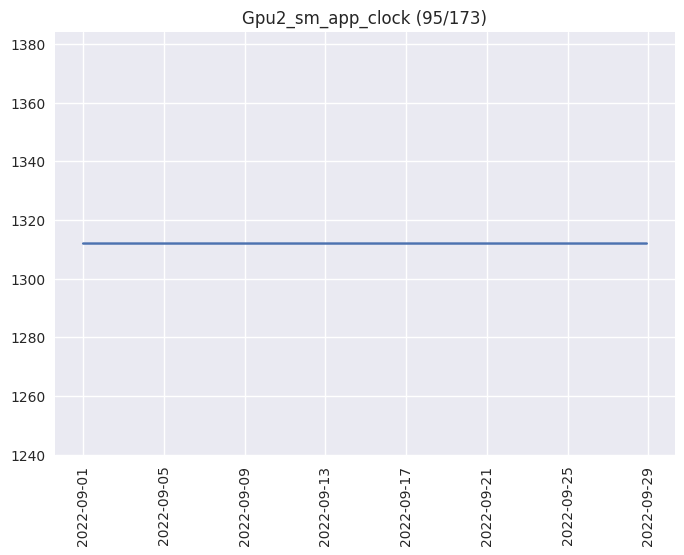

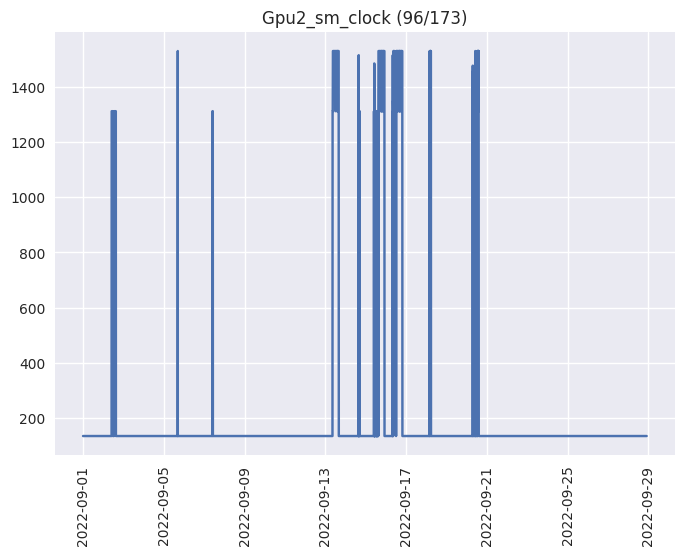

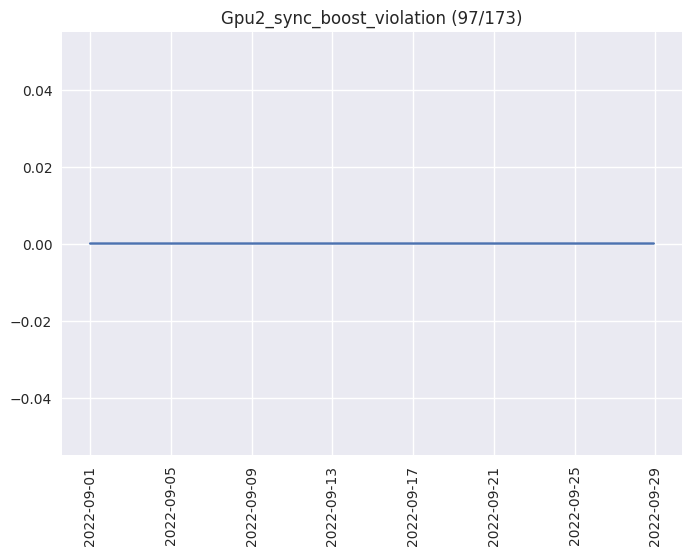

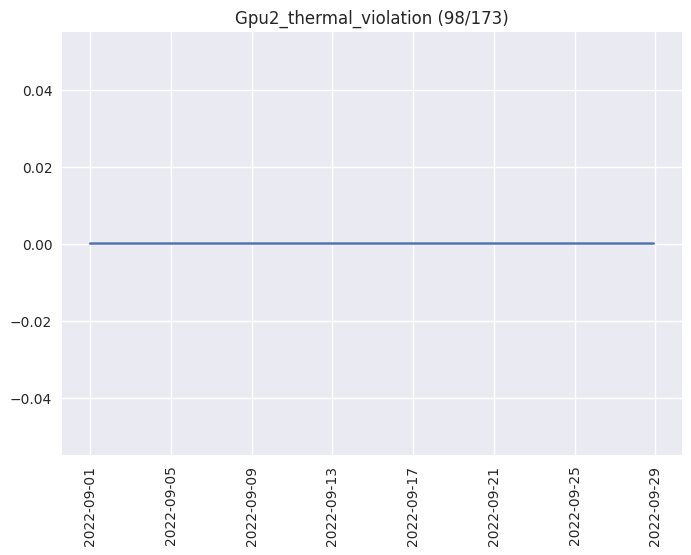

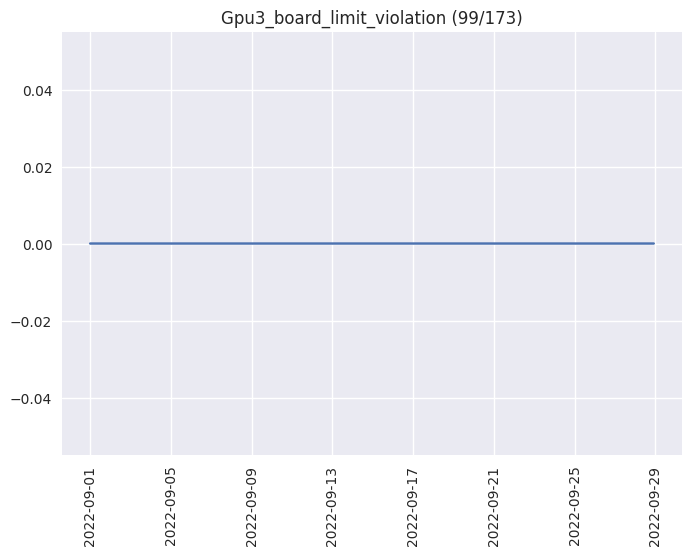

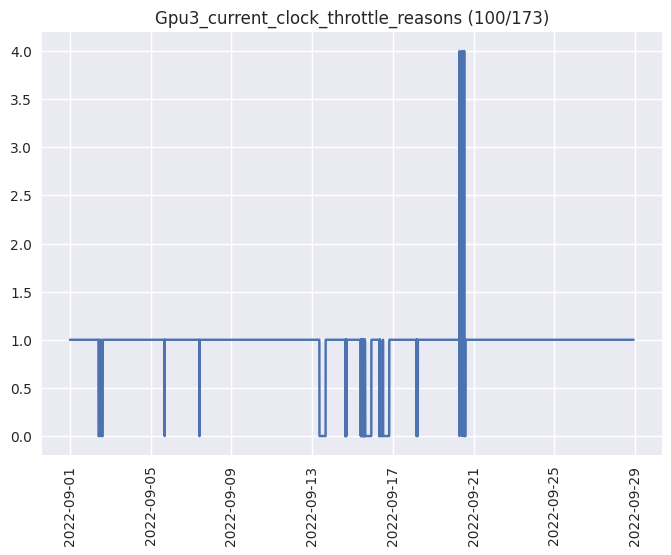

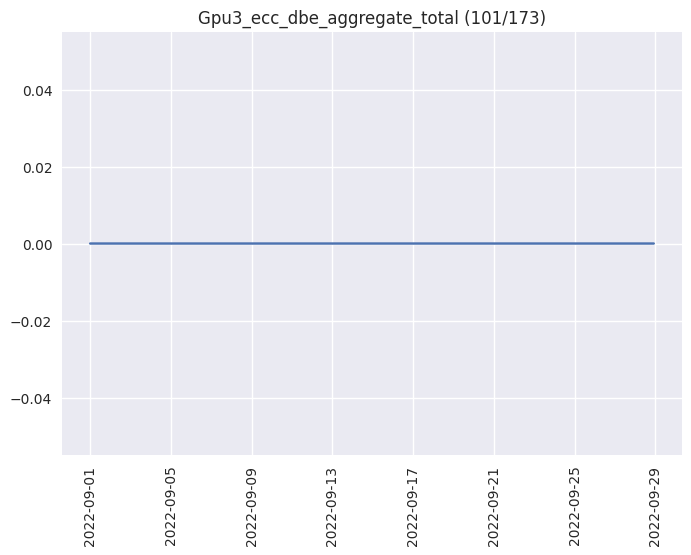

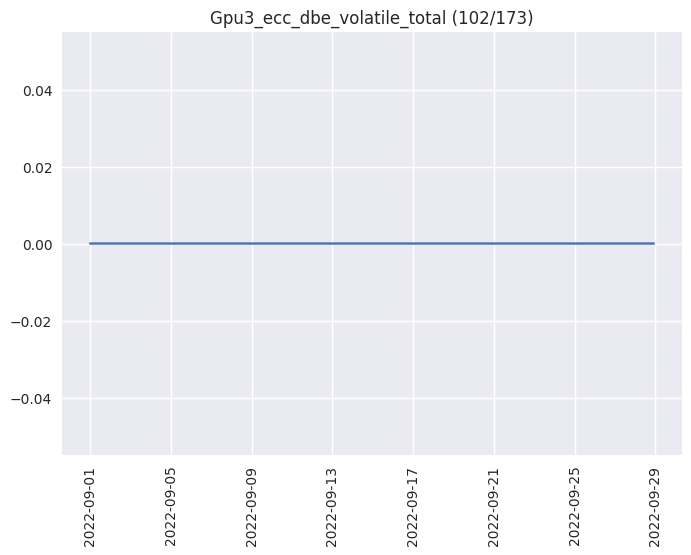

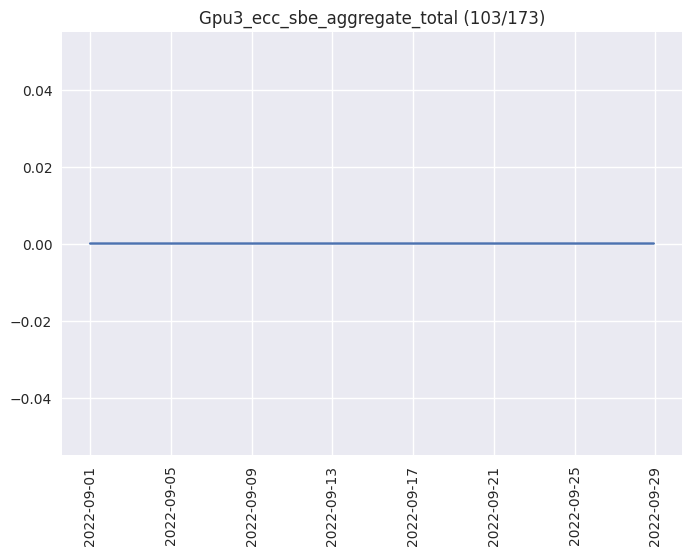

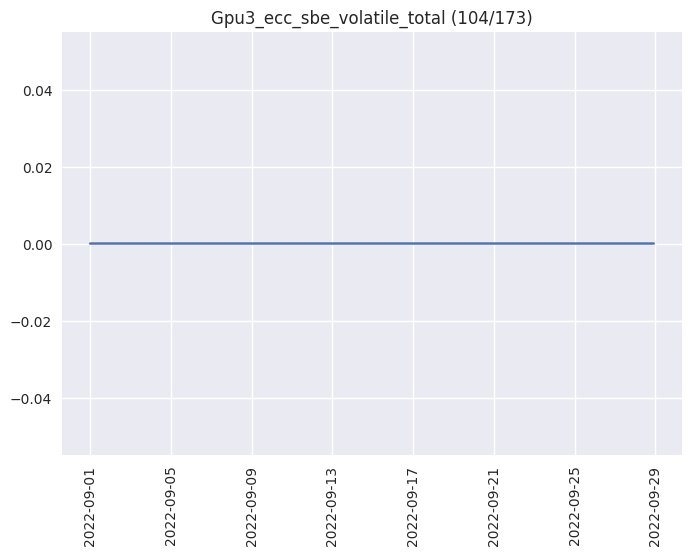

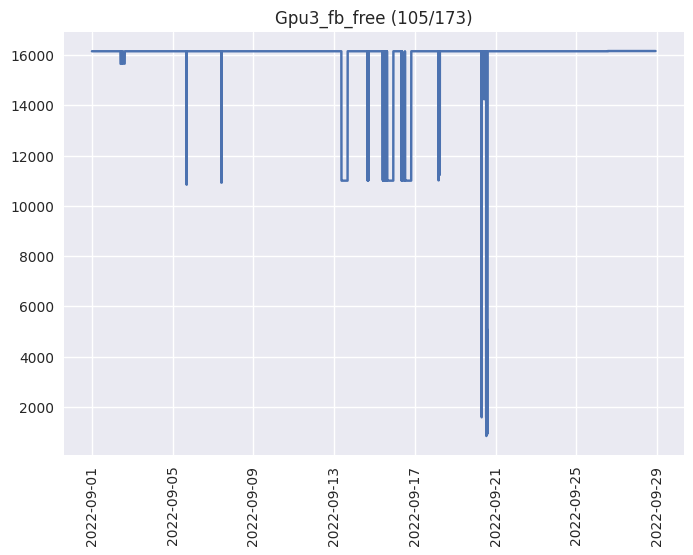

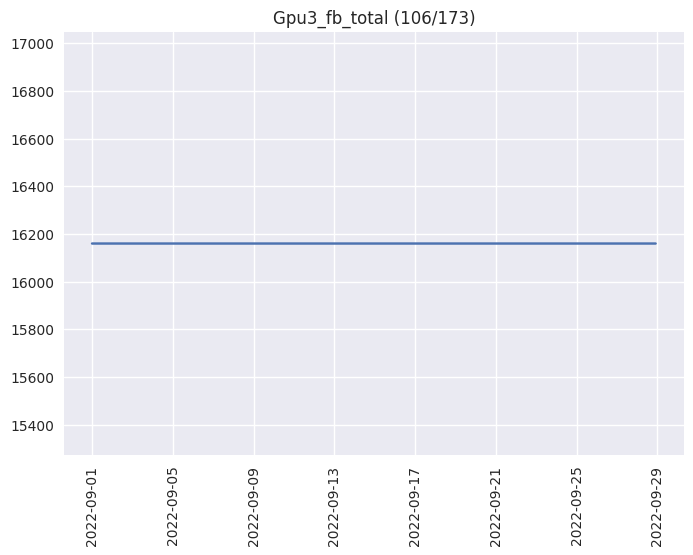

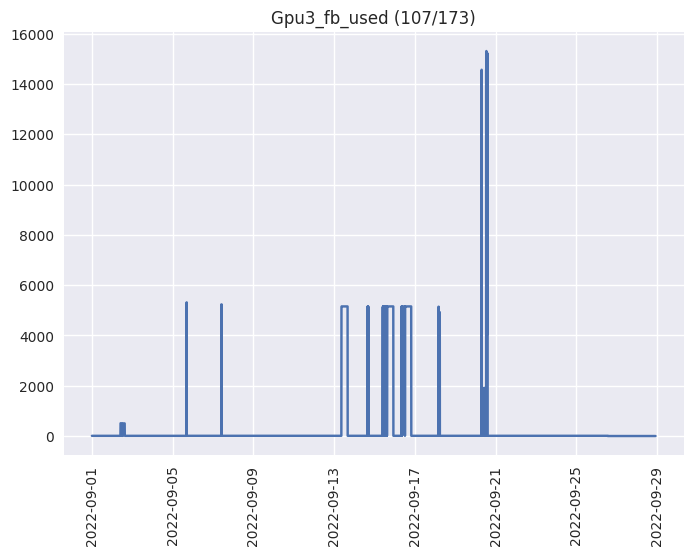

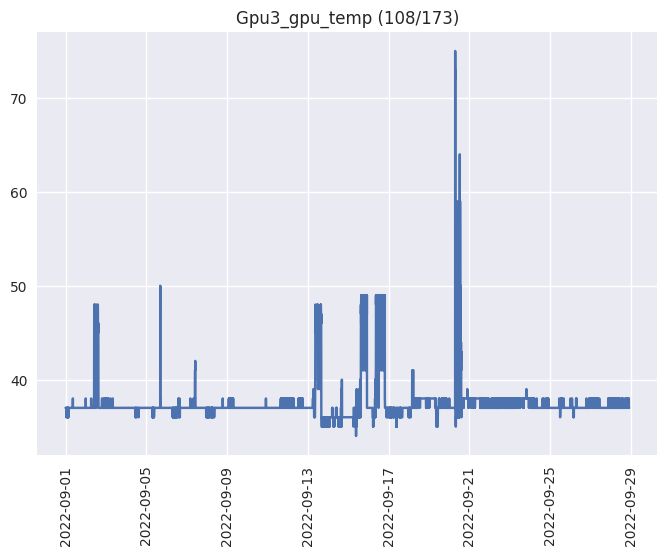

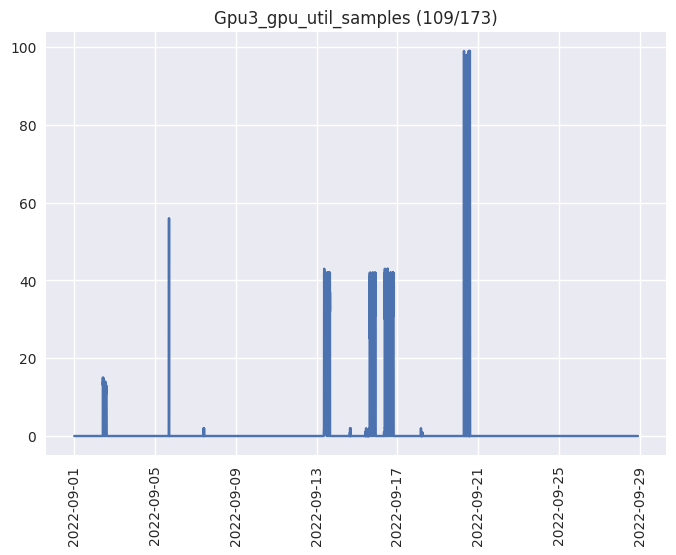

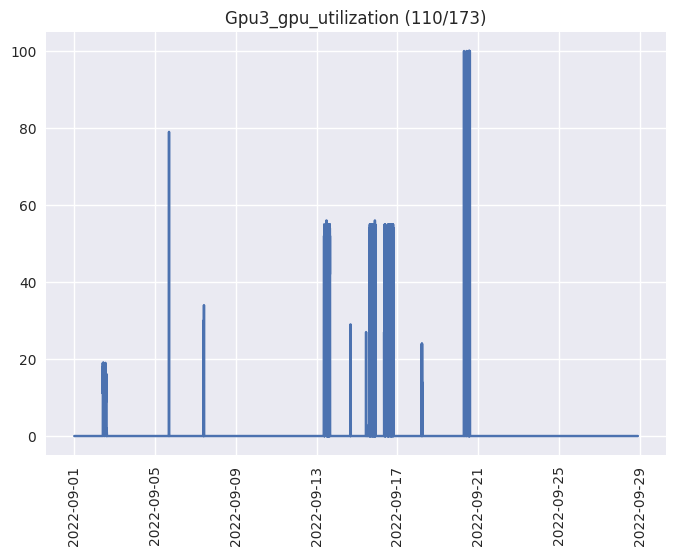

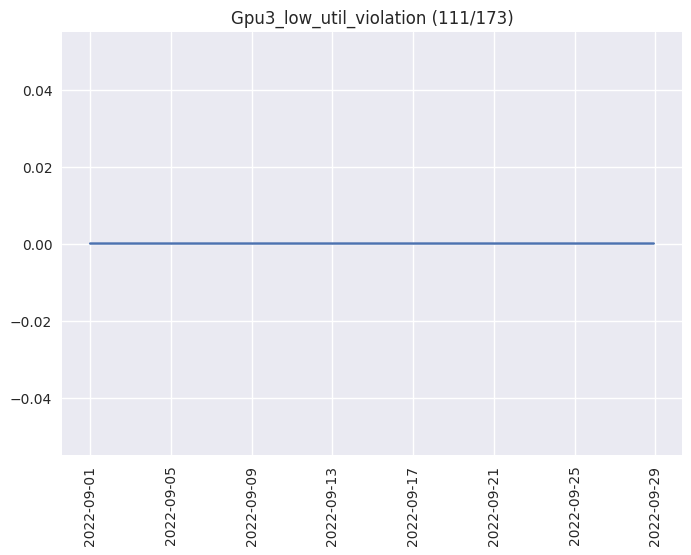

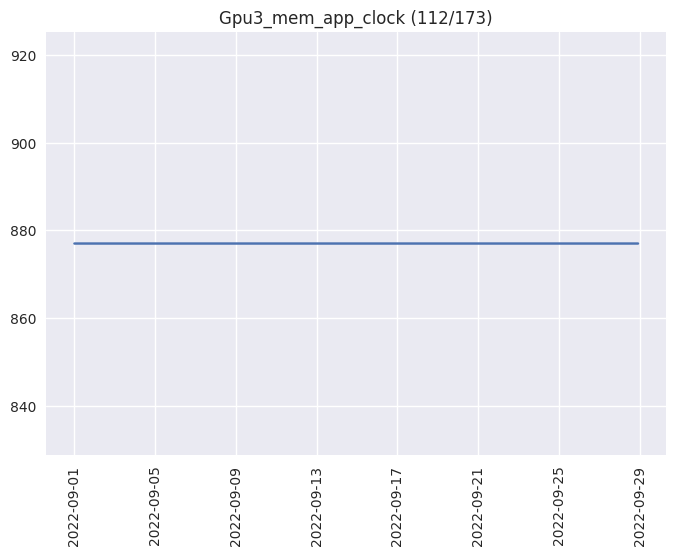

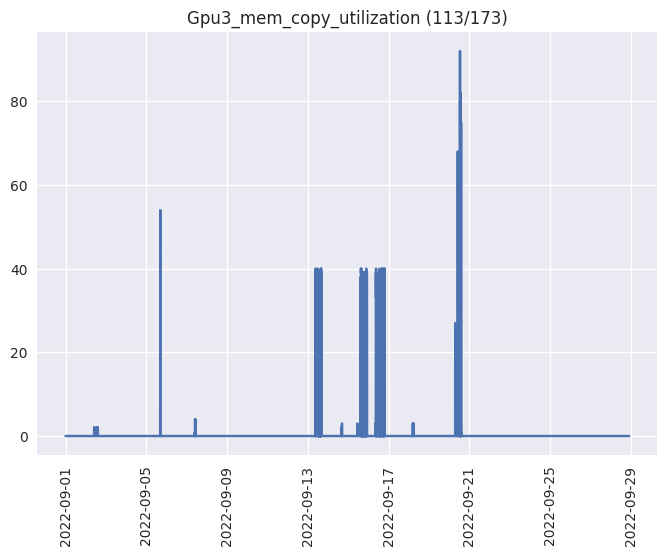

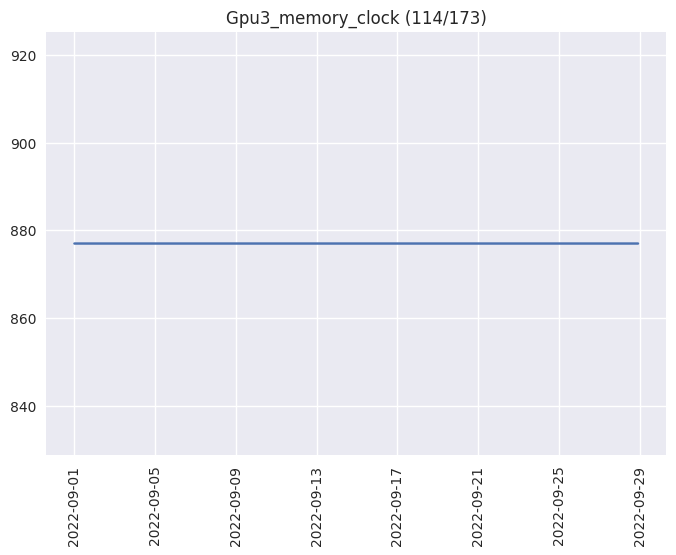

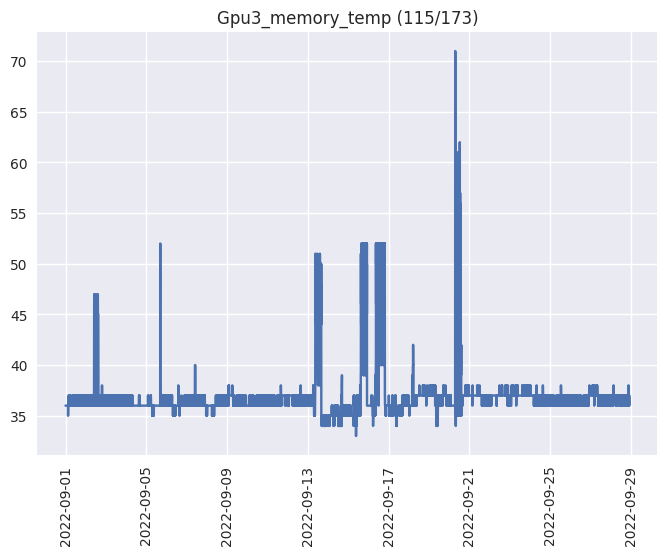

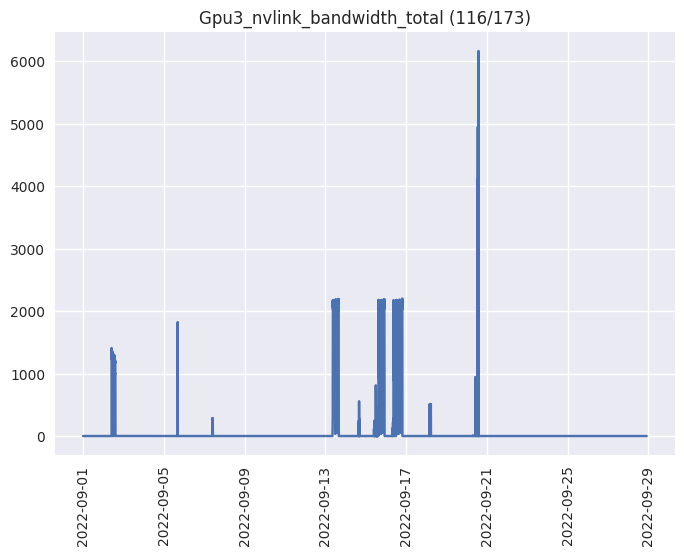

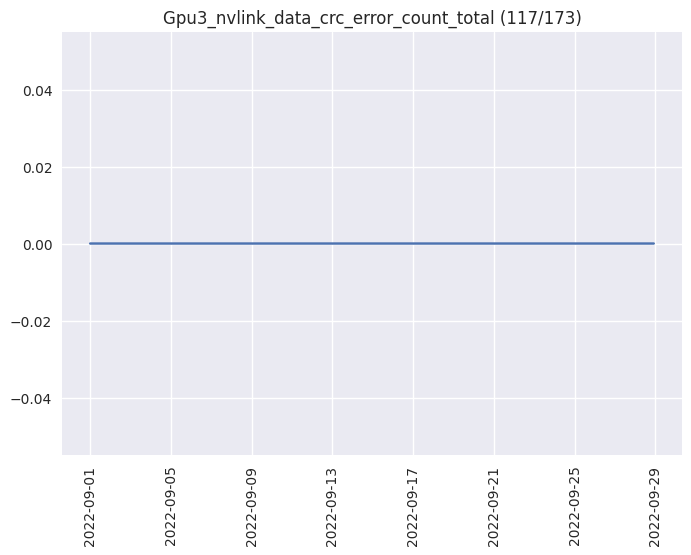

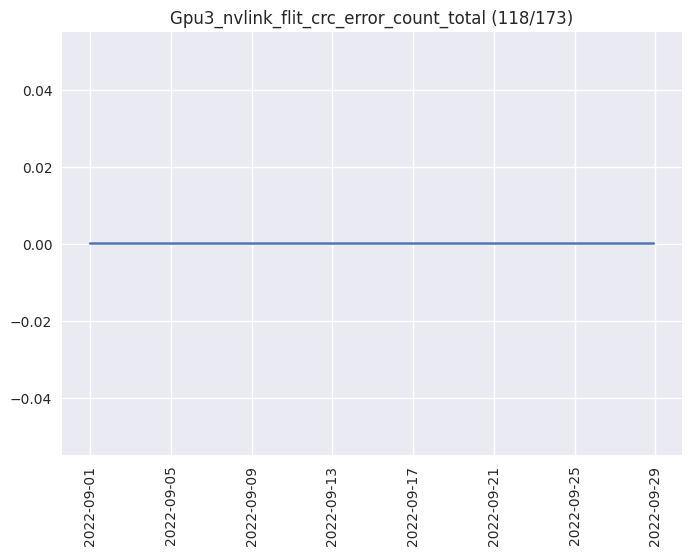

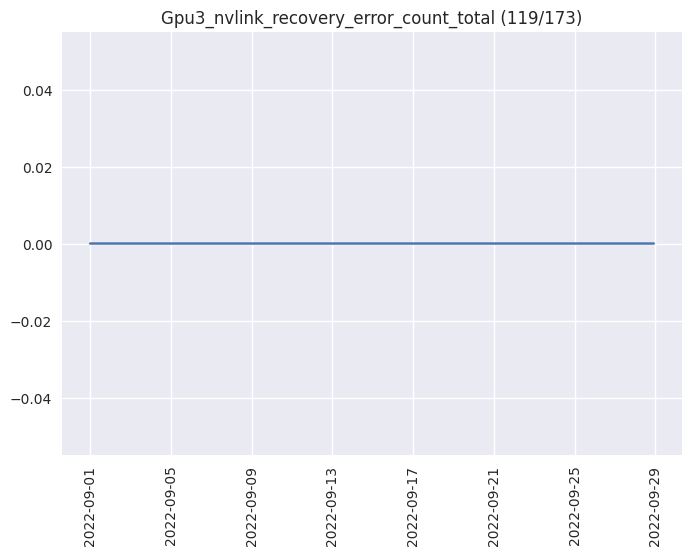

KeyboardInterrupt: 

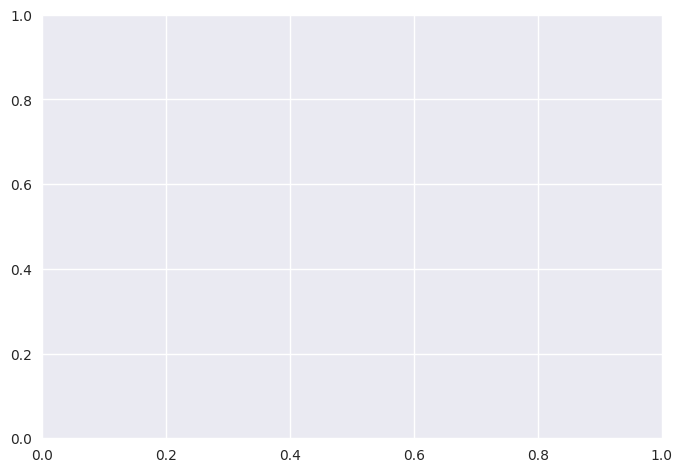

In [ ]:
ganglia_metrics = df_ganglia["metric"].unique()
size = ganglia_metrics.size
for i, met in enumerate(ganglia_metrics):
    df_metric = df_ganglia.loc[df_ganglia["metric"] == met].sort_values(
        by="timestamp", ascending=True
    )
    plt.plot(df_metric["timestamp"], df_metric["value"])
    plt.title("{} ({}/{})".format(met, i + 1, size))
    plt.xticks(rotation="vertical")
    plt.show()